In [201]:
!grep ',,' data/house_train.csv
!grep ',,' data/house_test.csv

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [203]:
# We won't specify column names/types because the data is small enough that we don't hit issues.
# 'NA' is used both as a categorical value in several of the columns and to represent NaNs.  
# We'll need to sort this out when we engineer features.
train = pd.read_csv('data/house_train.csv')
test = pd.read_csv('data/house_test.csv')

In [204]:
train_trans = pd.DataFrame()
test_trans = pd.DataFrame()

In [205]:
# Categorical (Text) - Encode label -> categorical (integer)
# Categorical (Integer) - One hot!
# Continuous (Float/Integer) - DTB! Check for missing (bomb if missing...), convert to float (if necessary...), check distribution (bomb if skewed, etc...), transform (BoxCox) and scale (StandardScaler).

categorical_text = train.dtypes[train.dtypes == np.object].index.values
continuous_float = train.dtypes[train.dtypes == np.float].index.values

continuous_int_str = 'LotArea, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold'
continuous_int = continuous_int_str.split(', ')

categorical_int = ['MSSubClass', 'OverallQual', 'OverallCond']

In [206]:
def continuous_distribution(column_name, train, test):
  
  plt.figure(figsize=(20,5))

  sns.distplot(train[column_name], label='Train')
  sns.distplot(test[column_name], label='Test')

  plt.legend()
  plt.show()
  
  plt.figure(figsize=(20,5))

  plt.subplot(121)
  sns.boxplot(train[column_name])
  plt.subplot(122)
  sns.boxplot(test[column_name])

  plt.legend()
  plt.show()

In [207]:
def process_continuous(column_name):
  
  global train, train_trans, test, test_trans
  
  train_df = train
  test_df = test
  
  if (train[column_name].isnull().sum() > 0):
    train_df = train_trans
    train_trans['%s_NaN'%column_name] = (train[column_name].isnull()).astype(np.int)
    train_trans[column_name] = train[column_name].fillna(train[column_name].median())
  
  if (test[column_name].isnull().sum() > 0):
    test_df = test_trans
    test_trans['%s_NaN'%column_name] = (test[column_name].isnull()).astype(np.int)
    test_trans[column_name] = test[column_name].fillna(test[column_name].median())
  
  continuous_distribution(column_name, train_df, test_df)

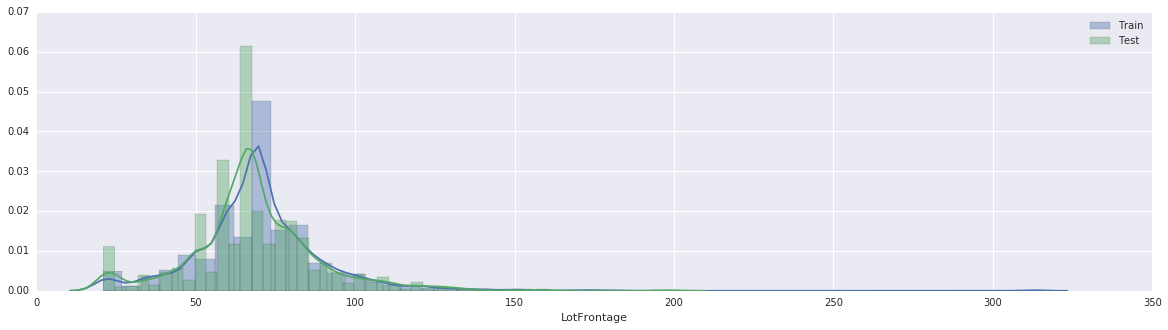

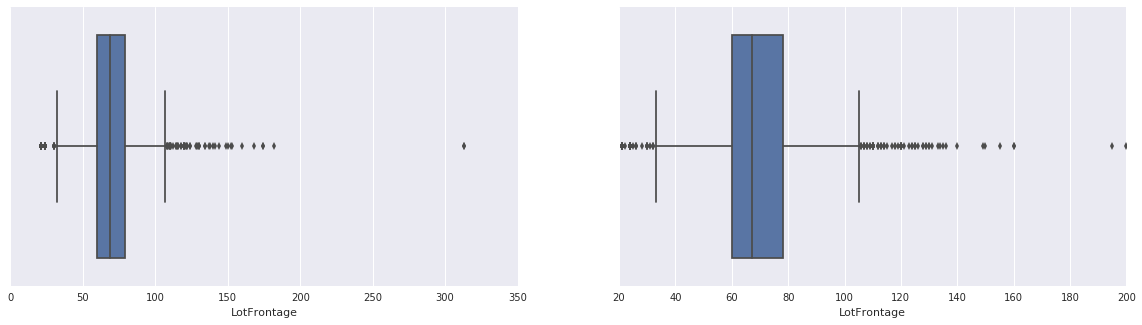

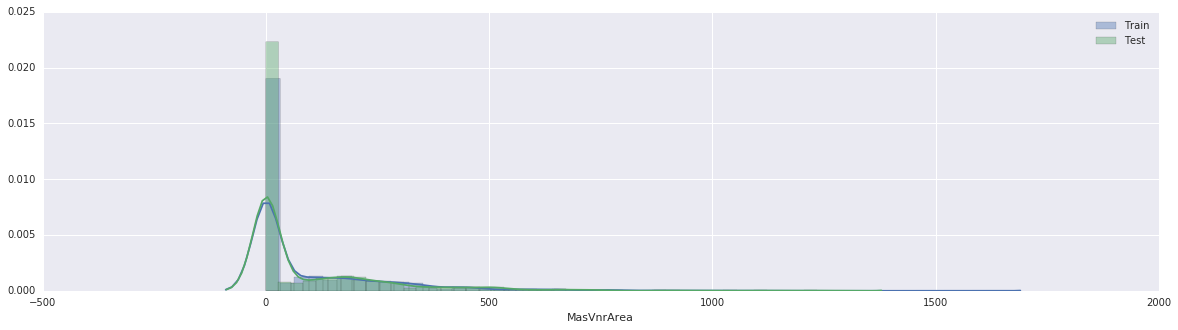

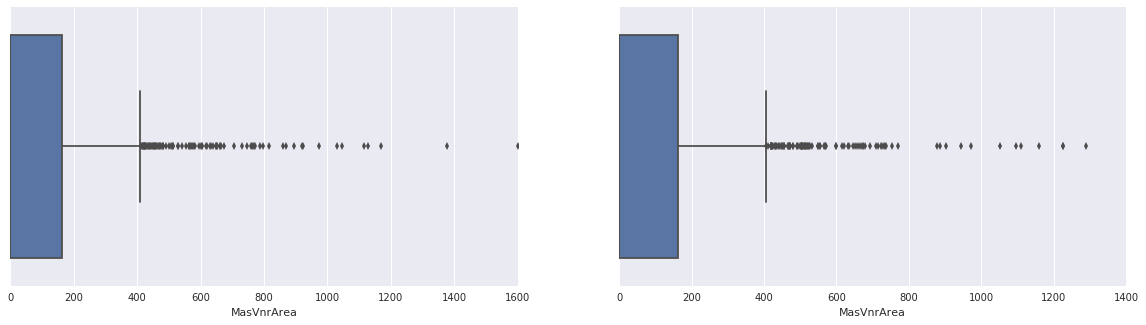

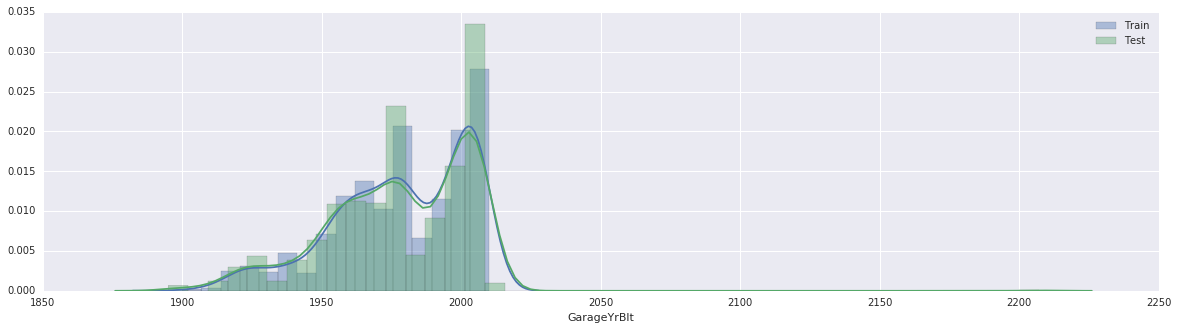

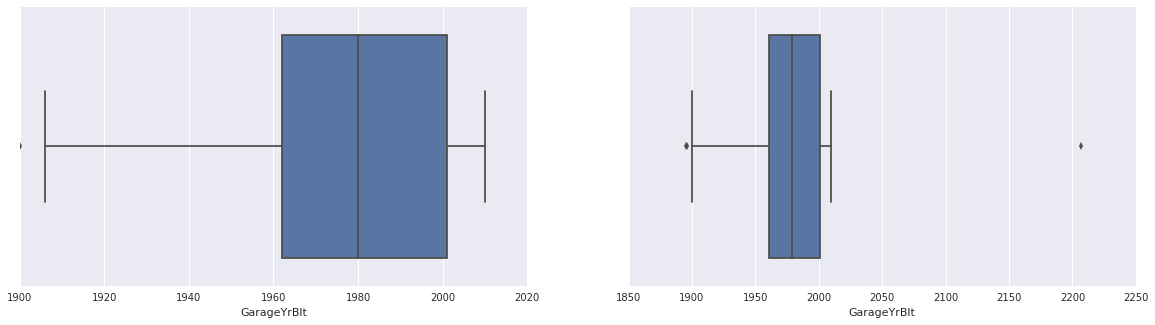

In [208]:
for column_name in continuous_float:
  process_continuous(column_name)

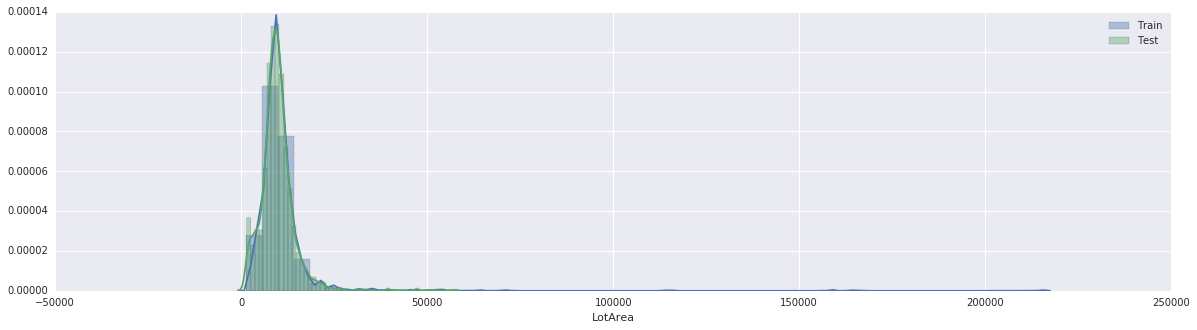

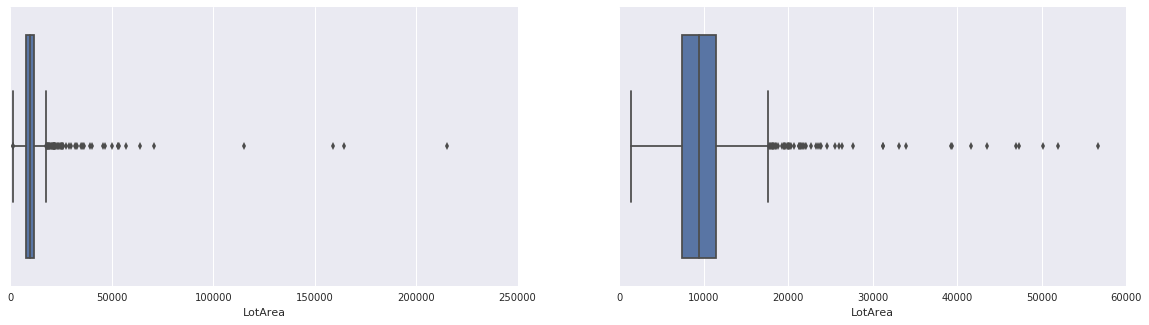

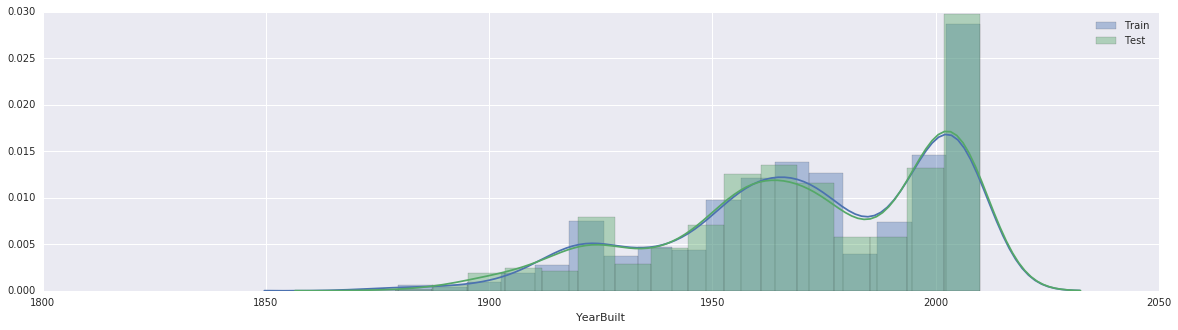

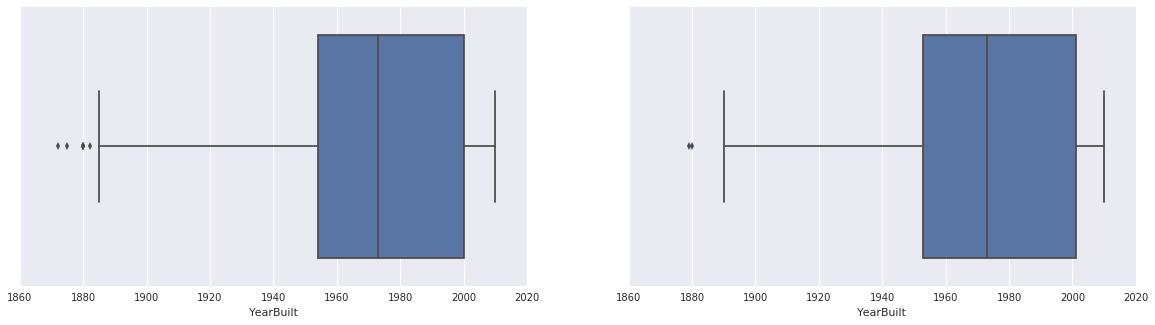

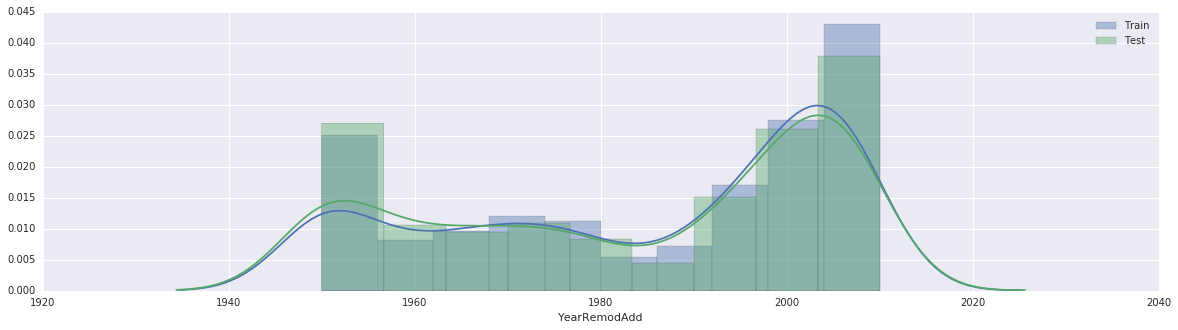

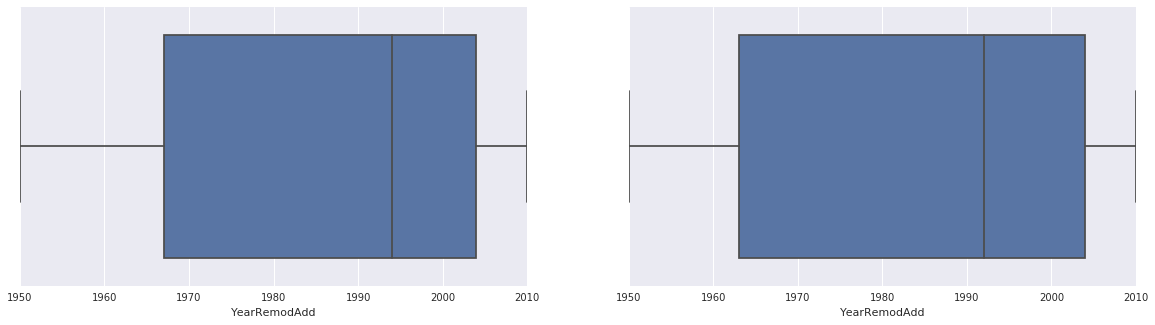

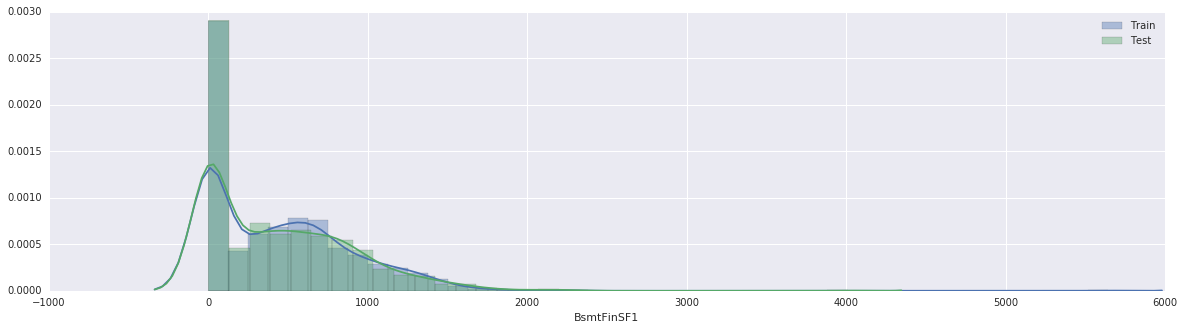

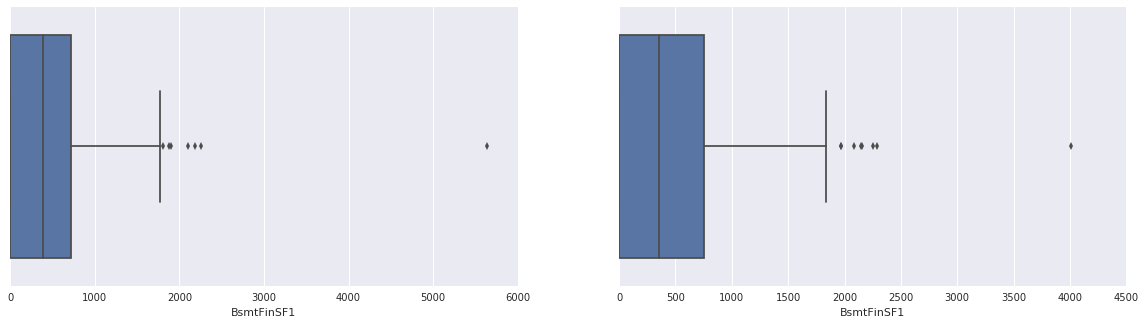

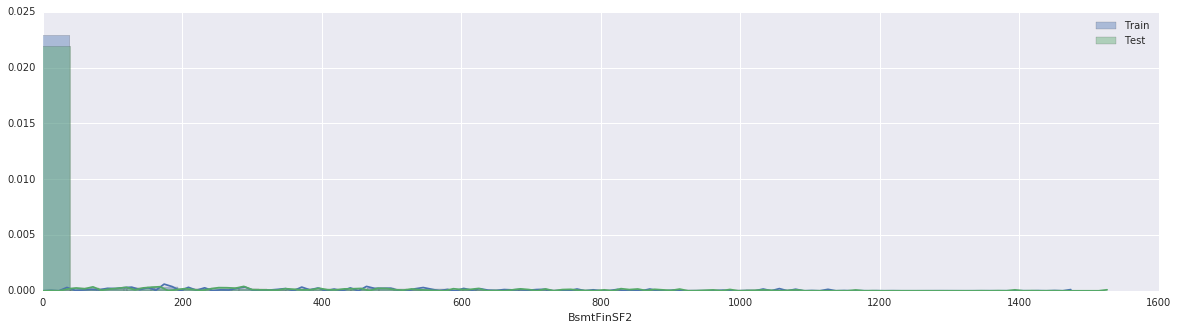

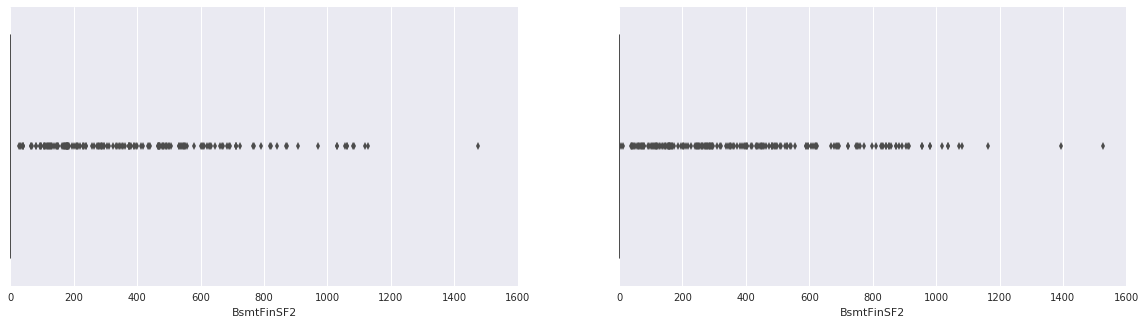

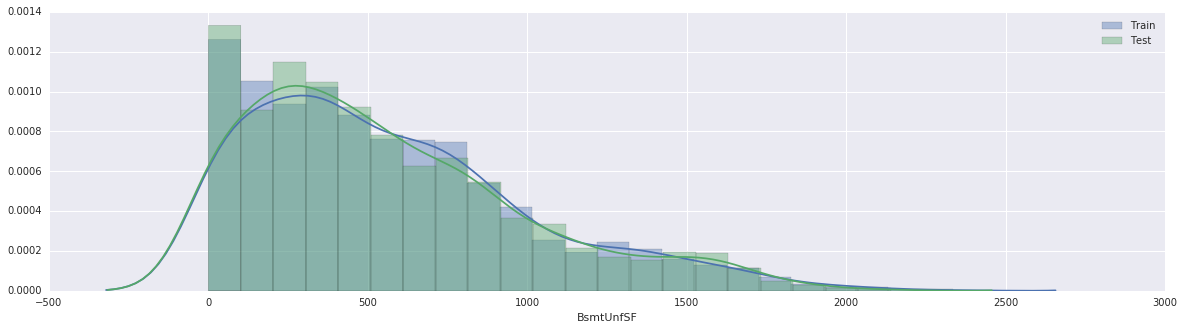

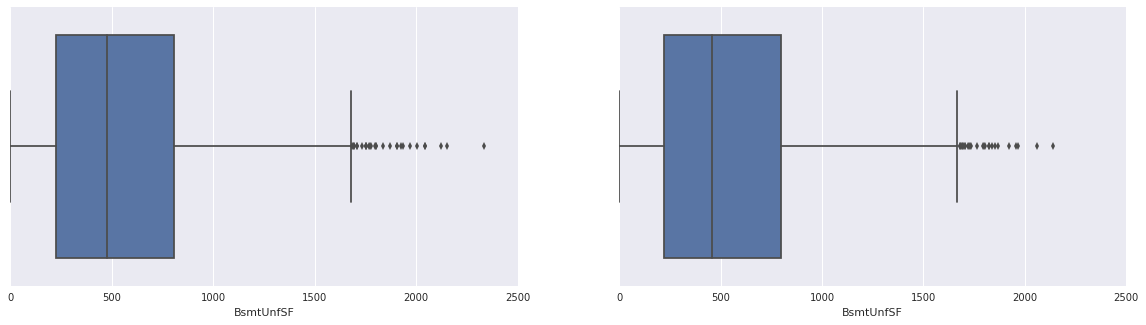

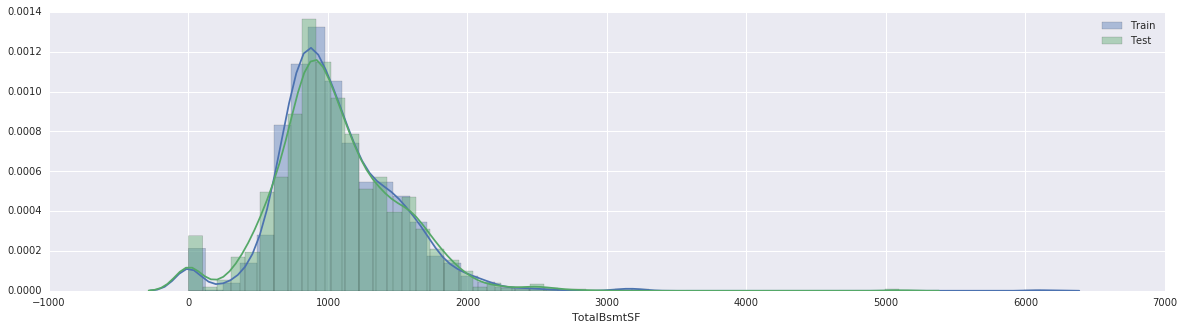

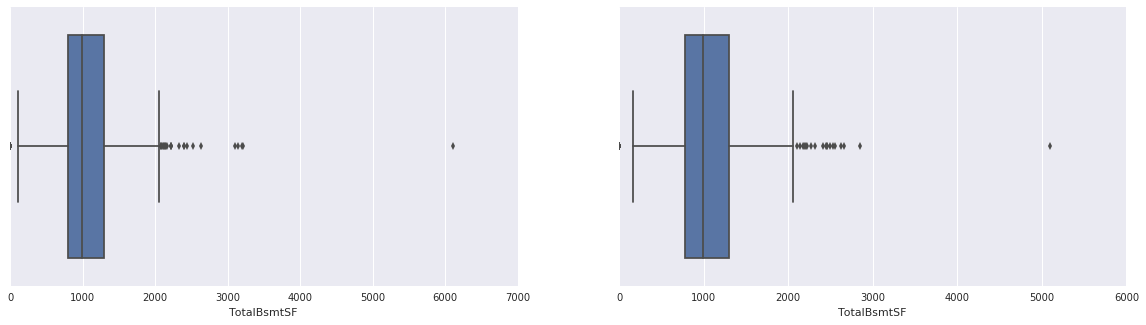

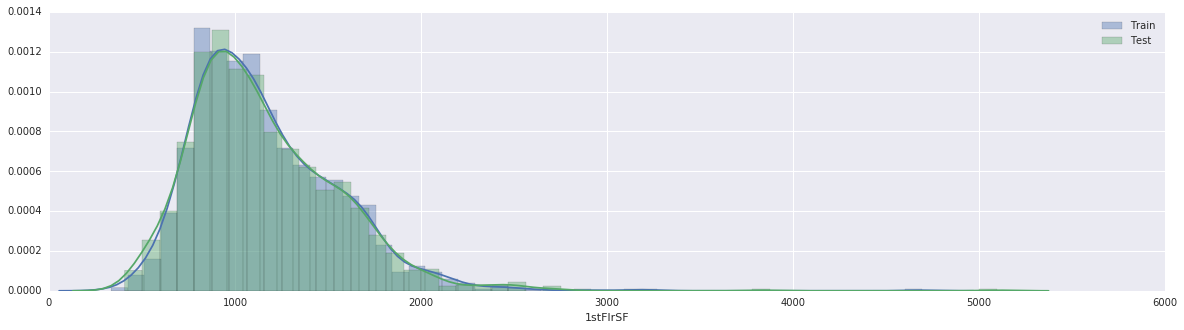

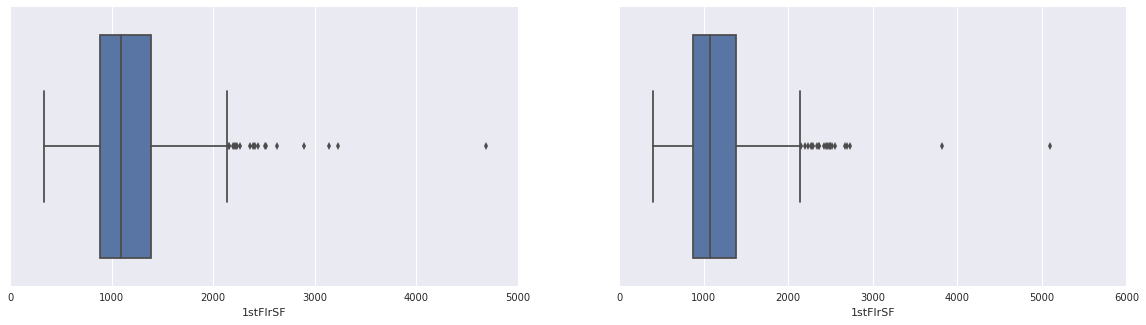

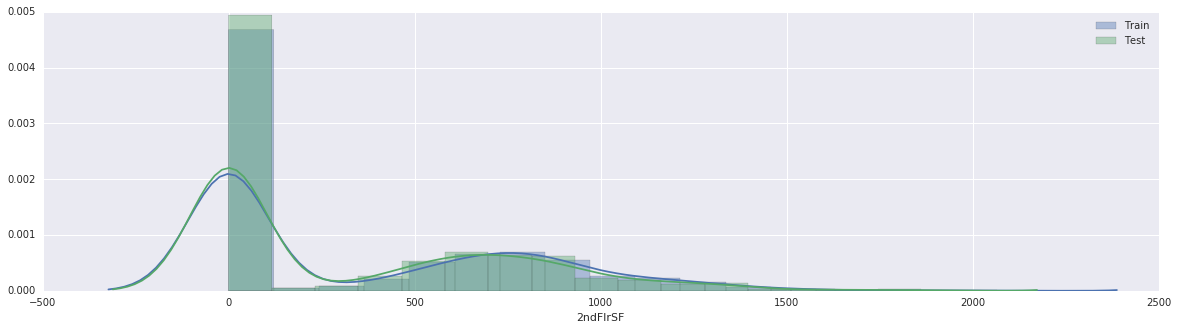

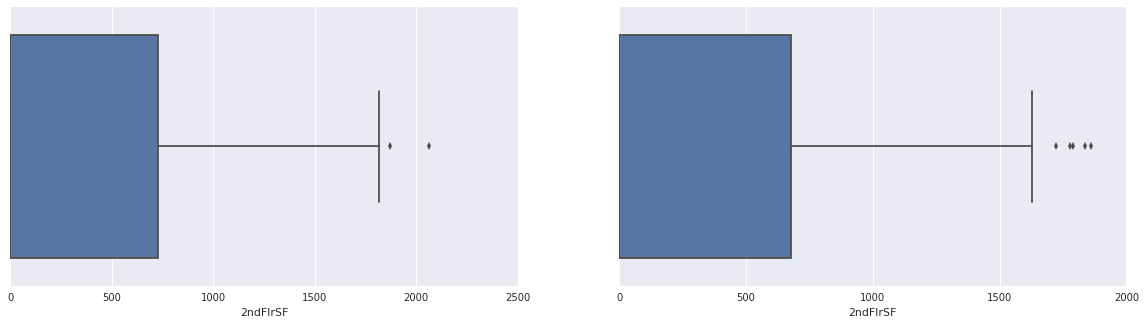

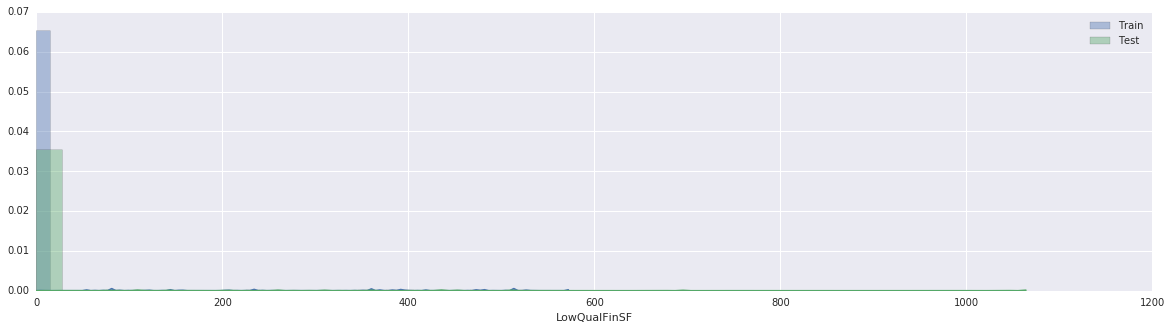

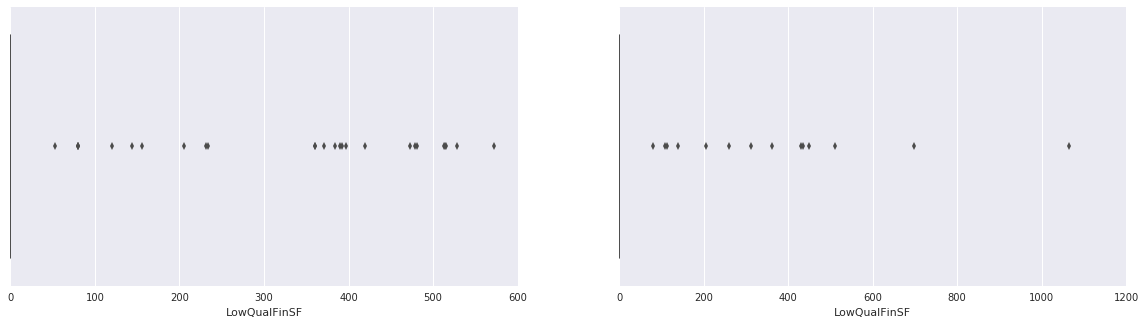

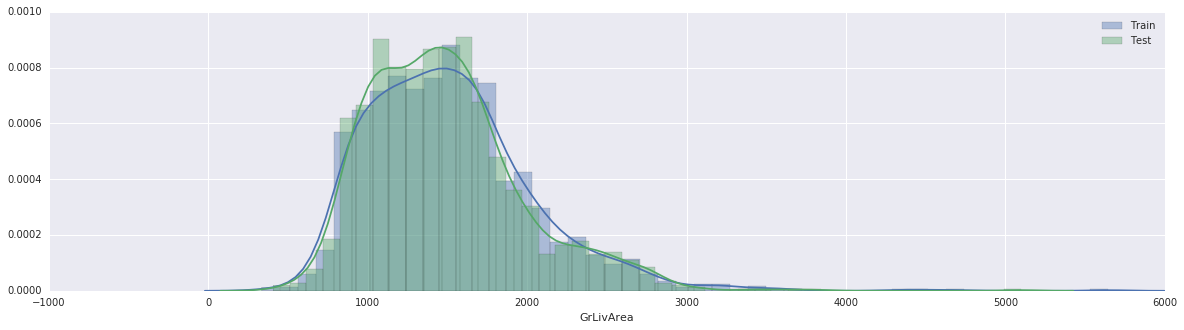

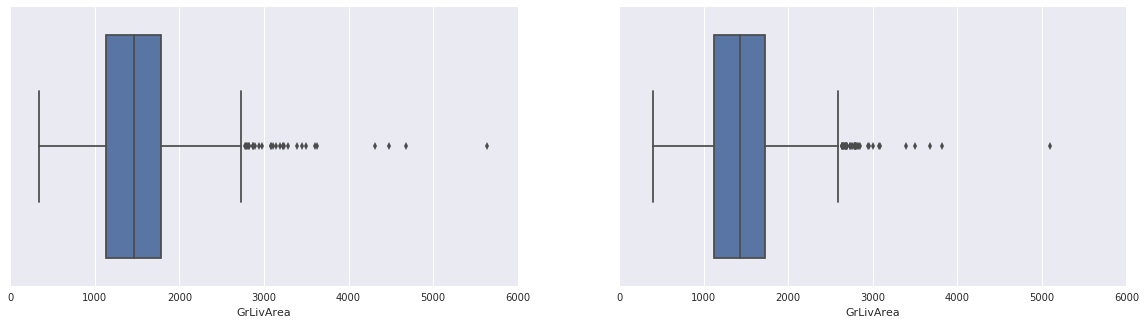

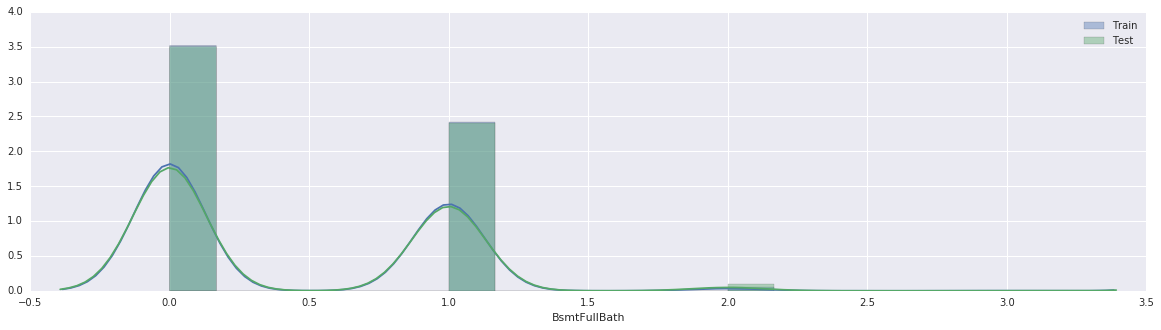

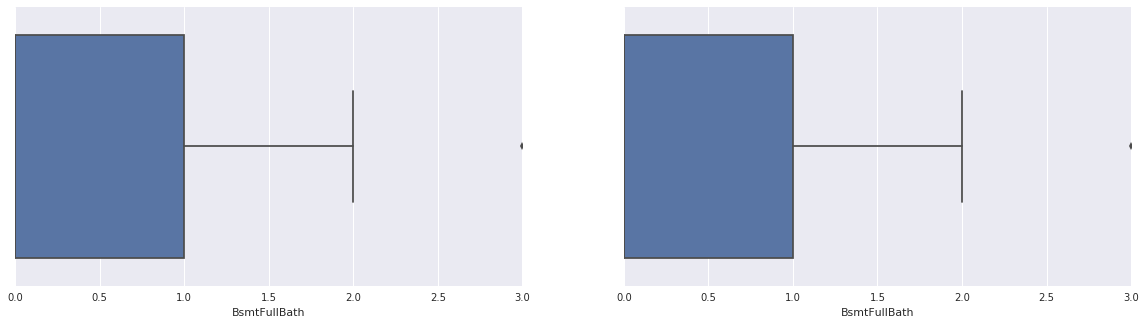

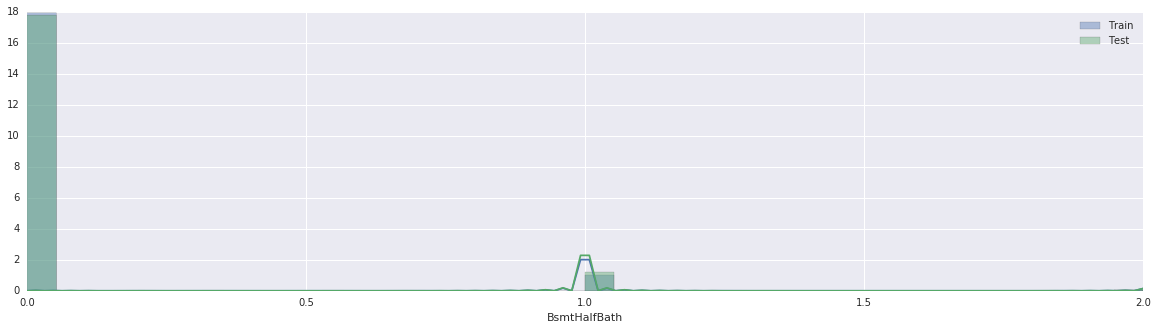

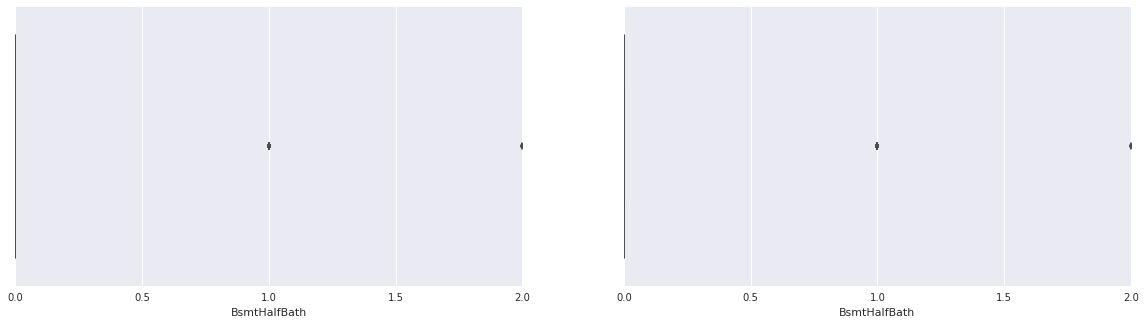

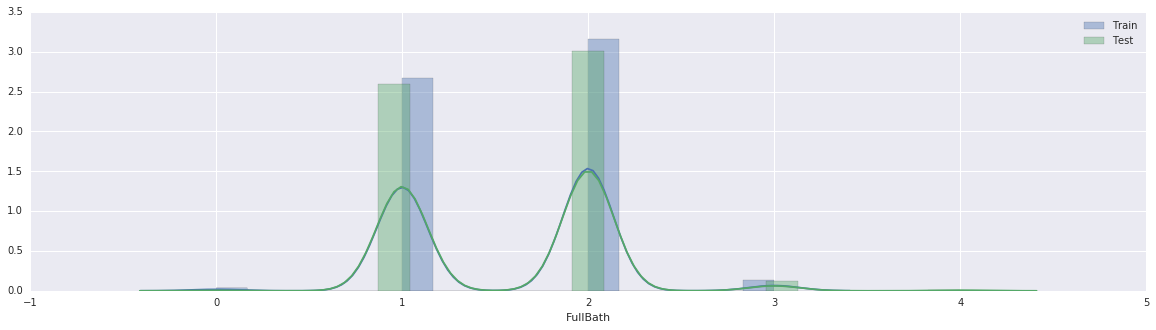

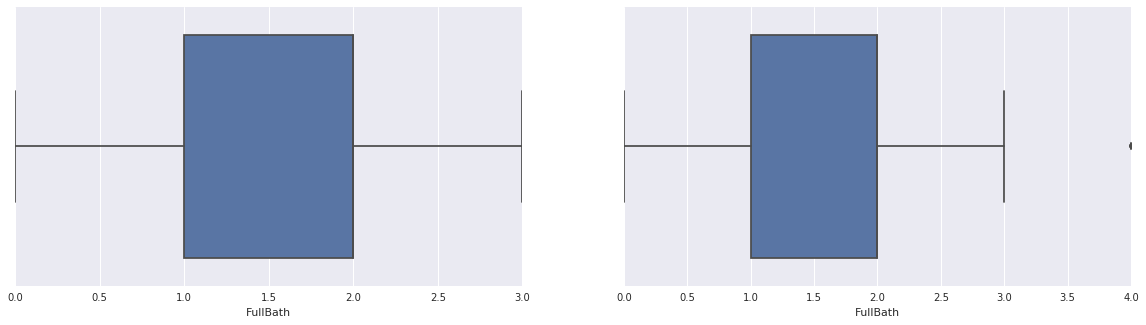

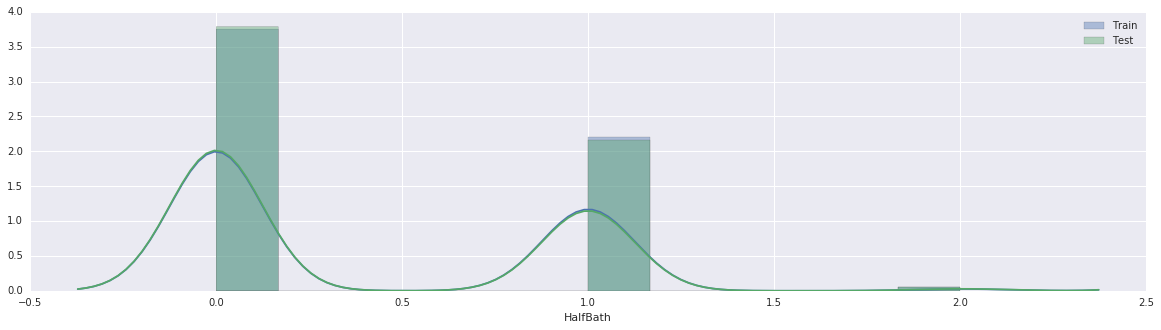

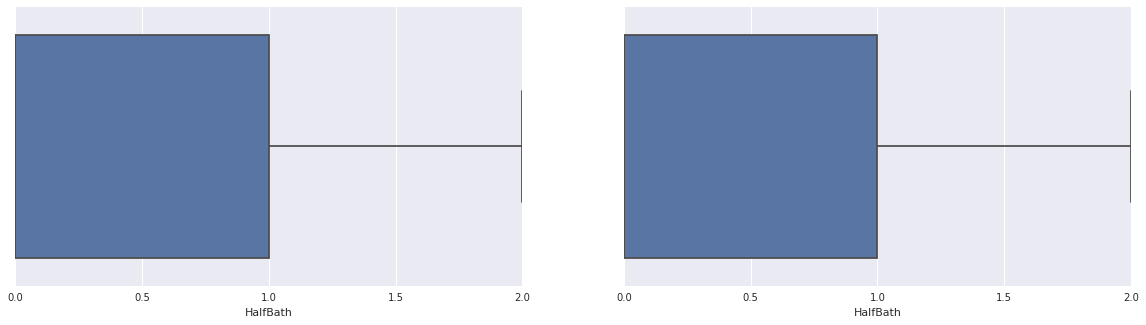

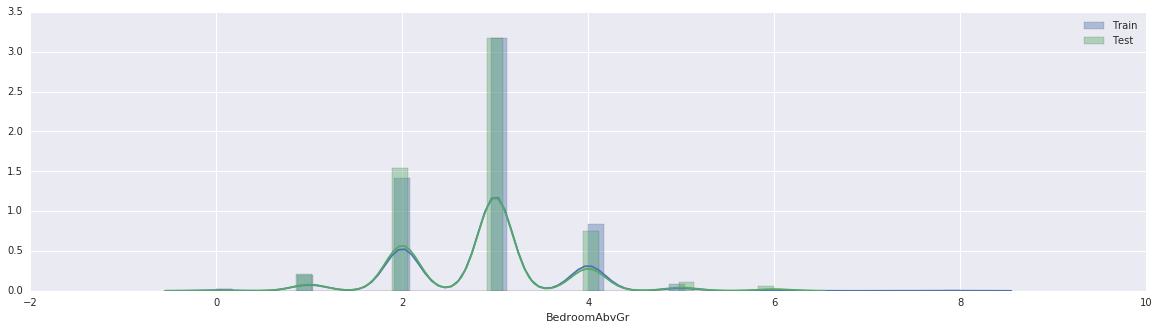

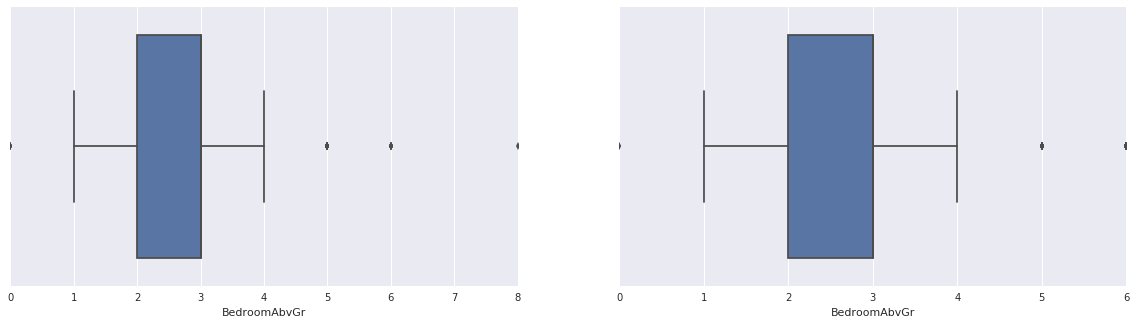

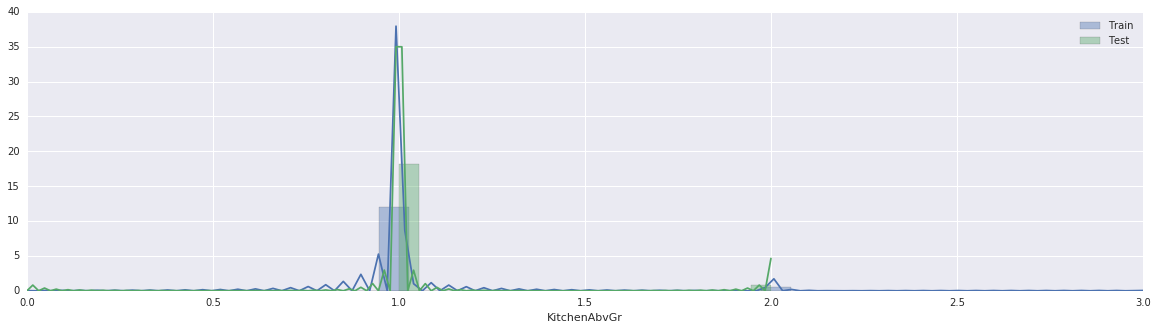

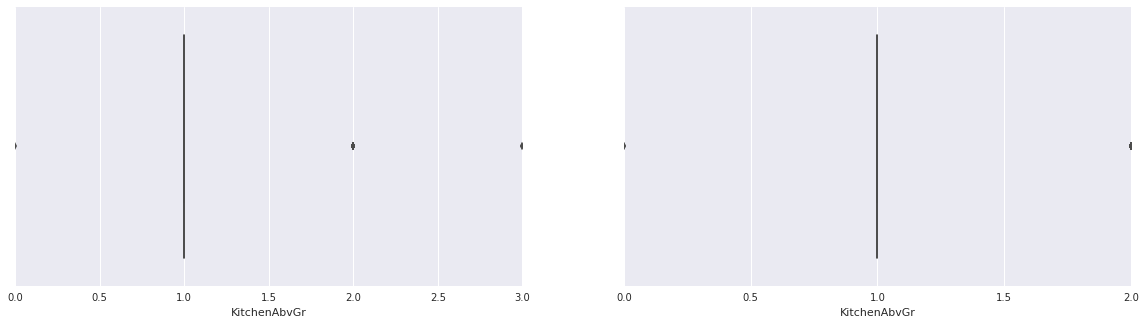

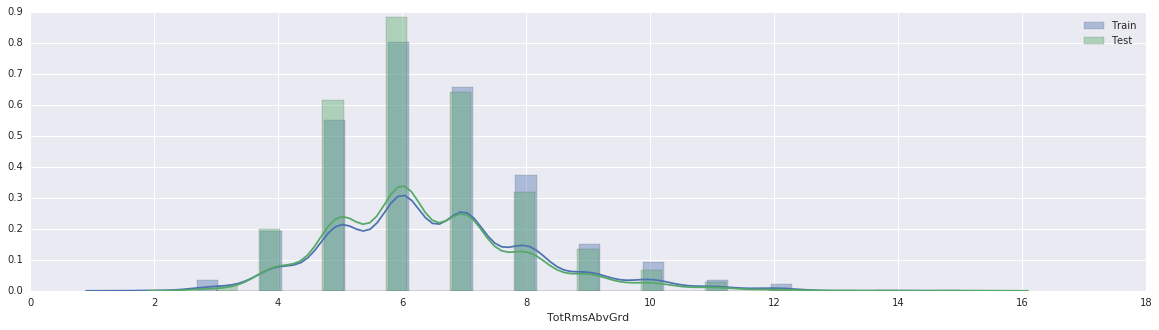

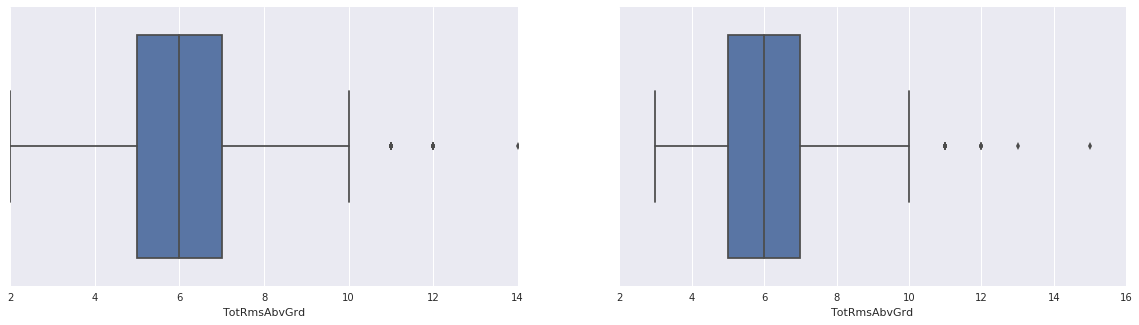

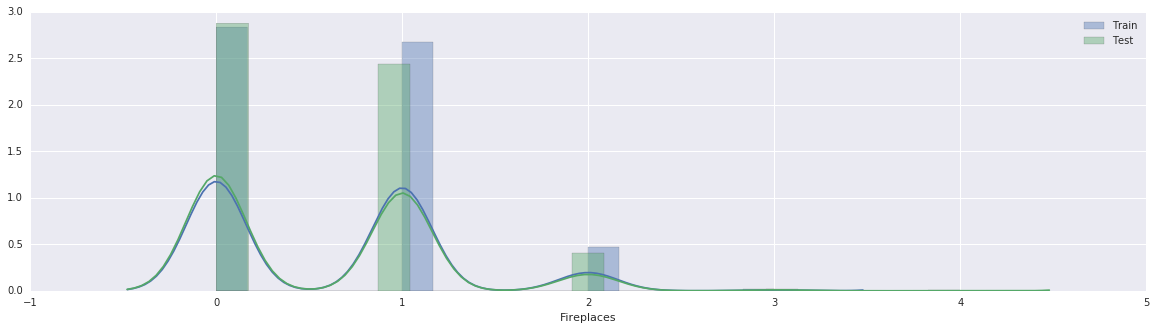

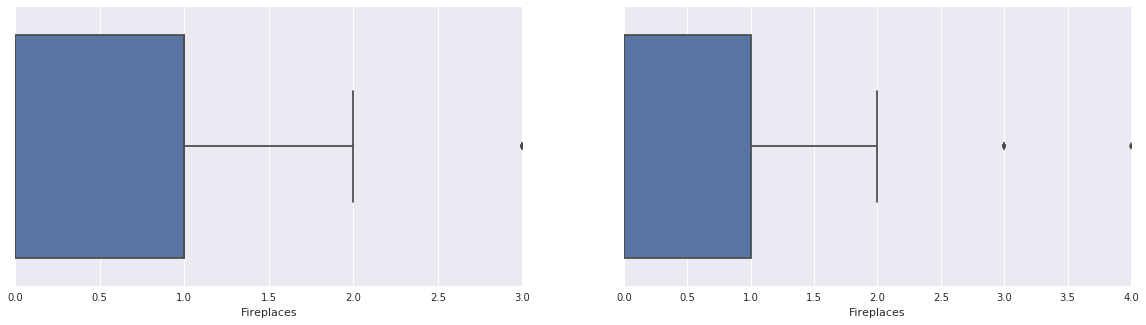

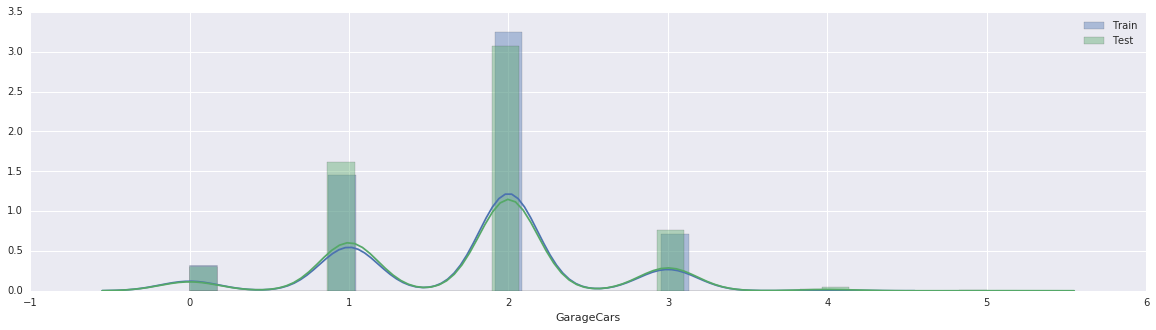

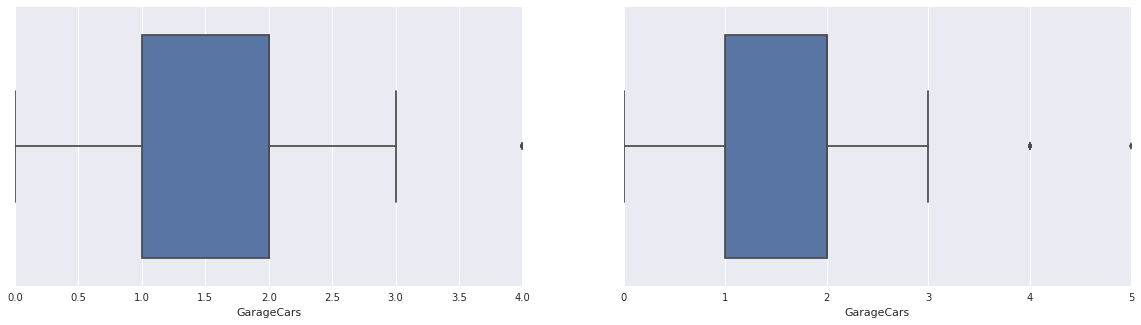

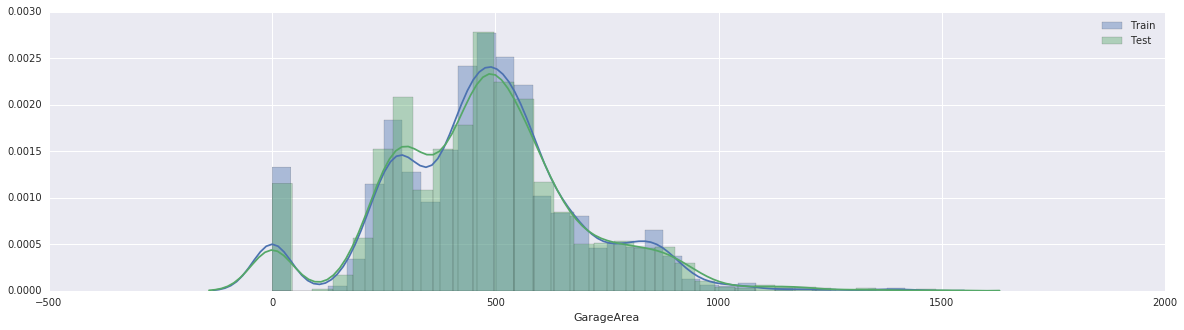

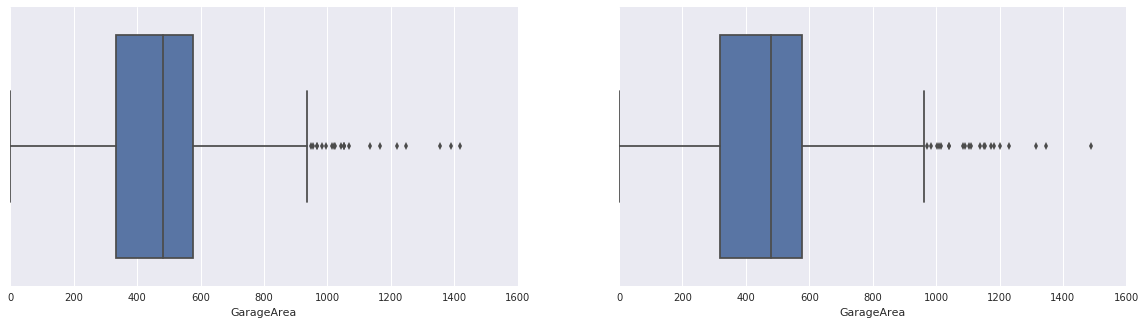

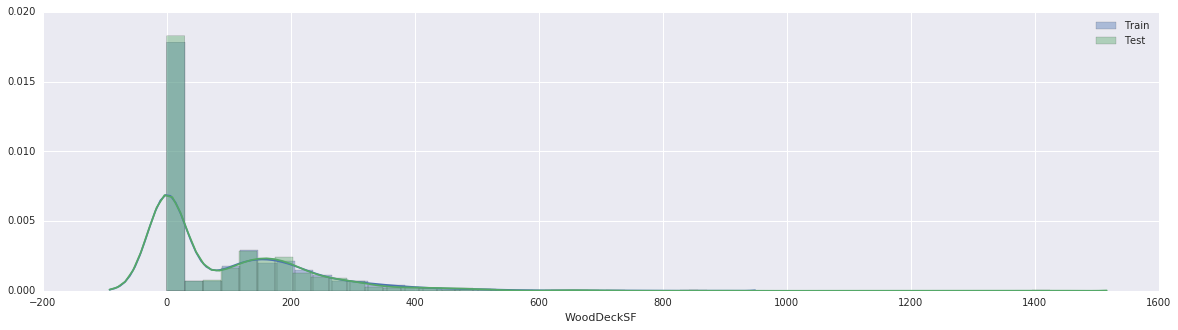

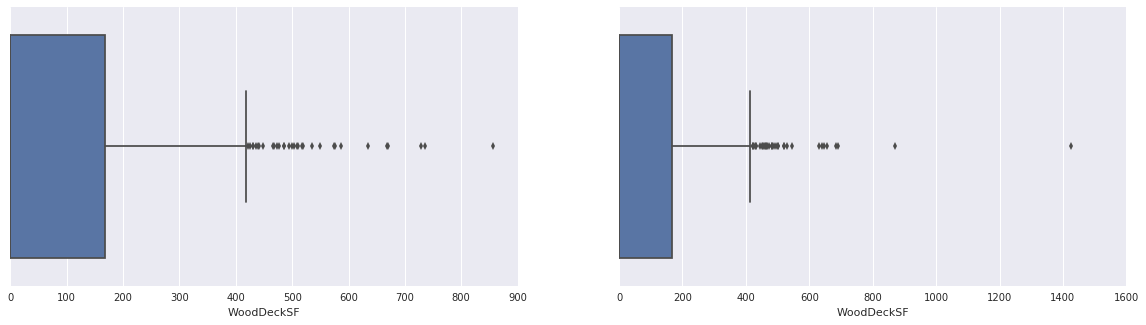

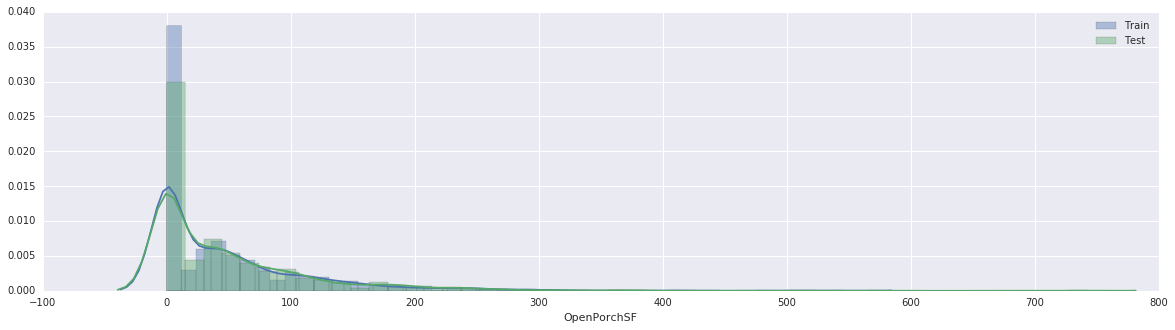

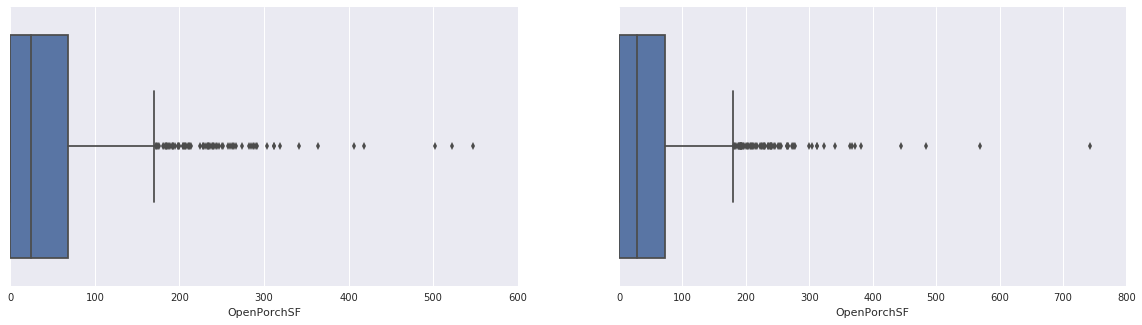

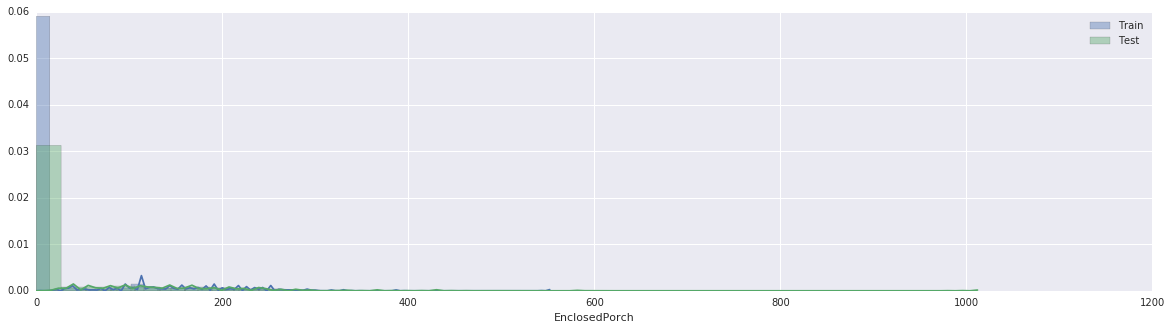

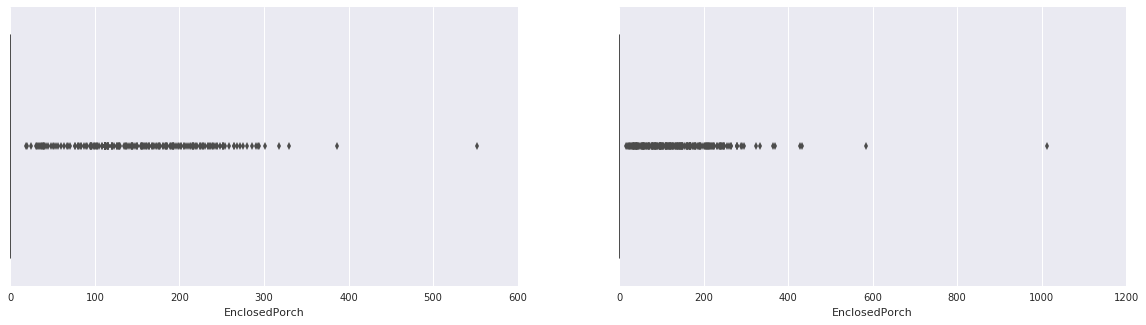

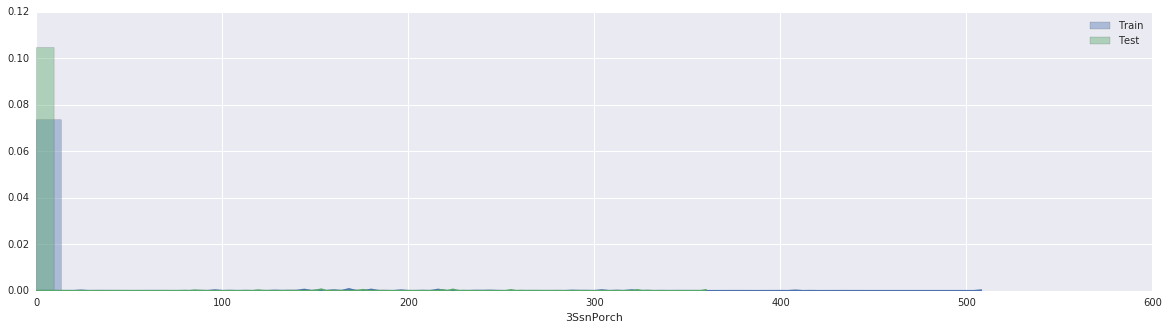

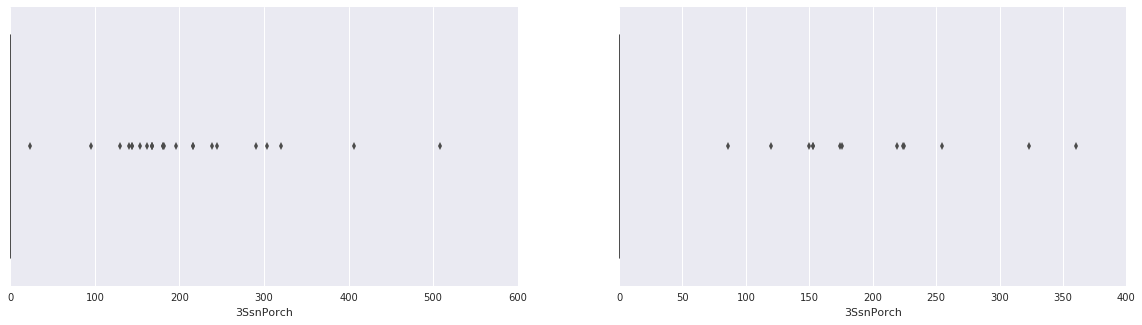

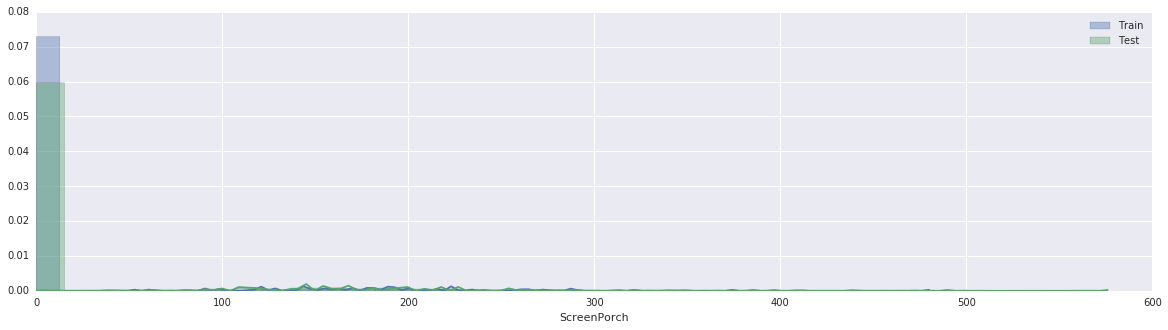

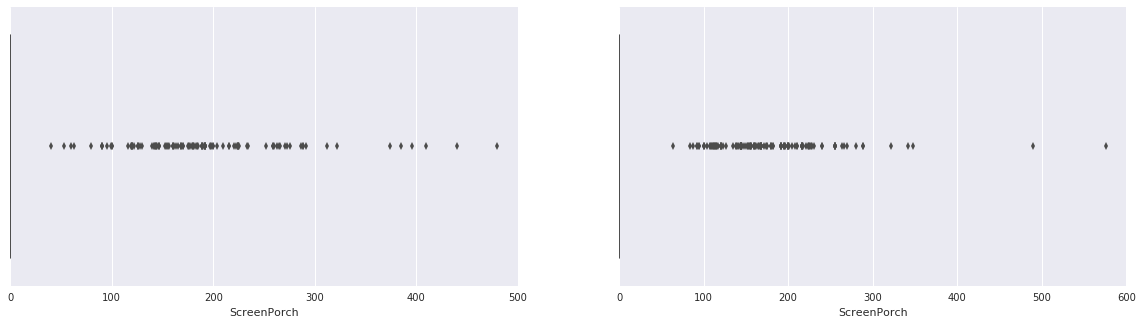

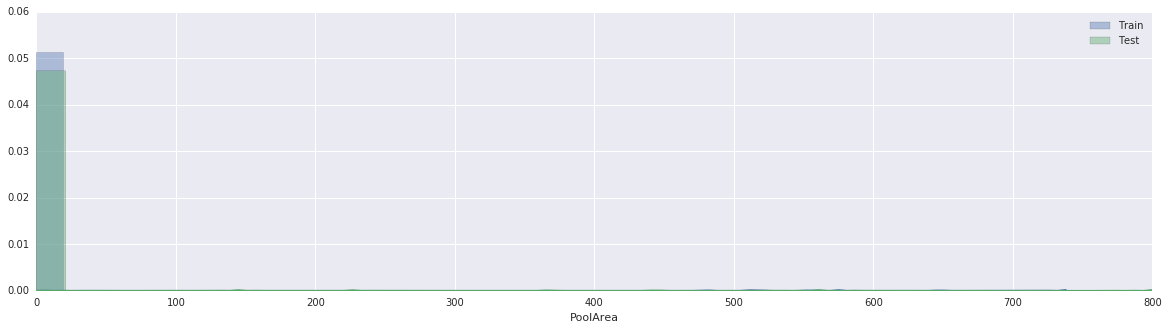

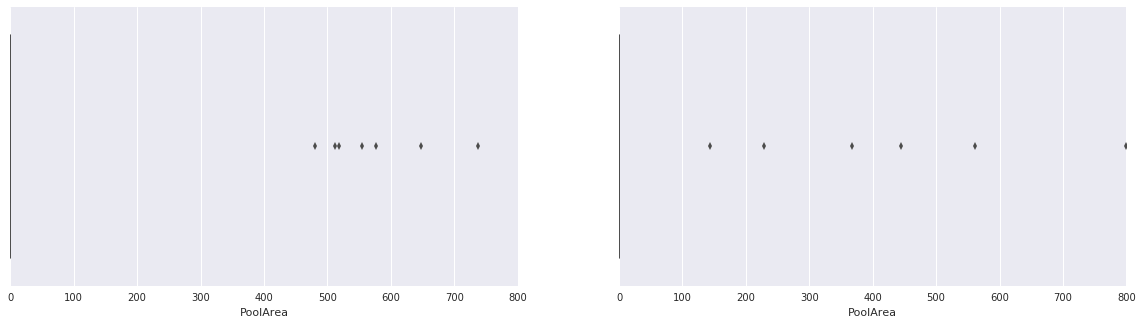

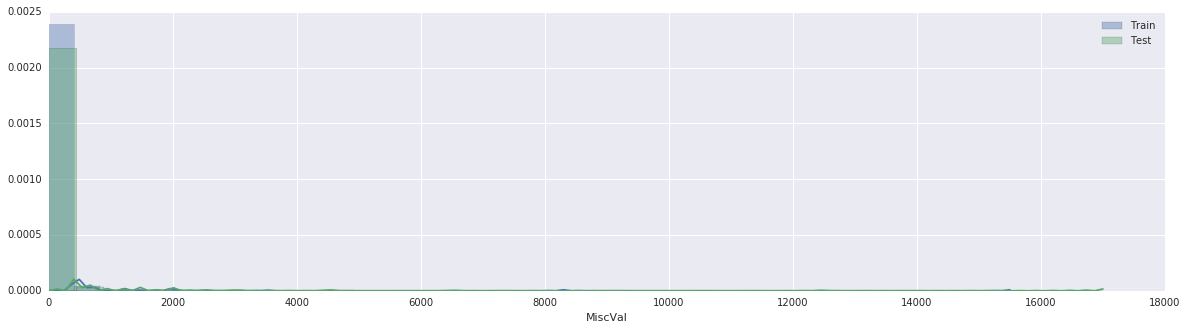

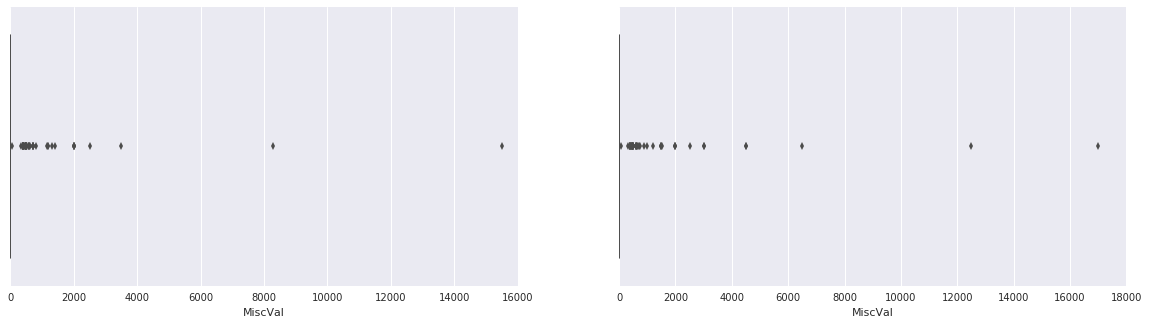

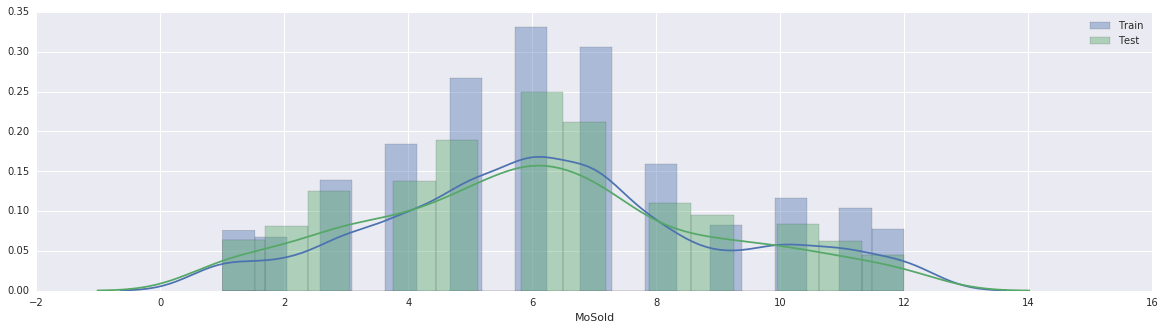

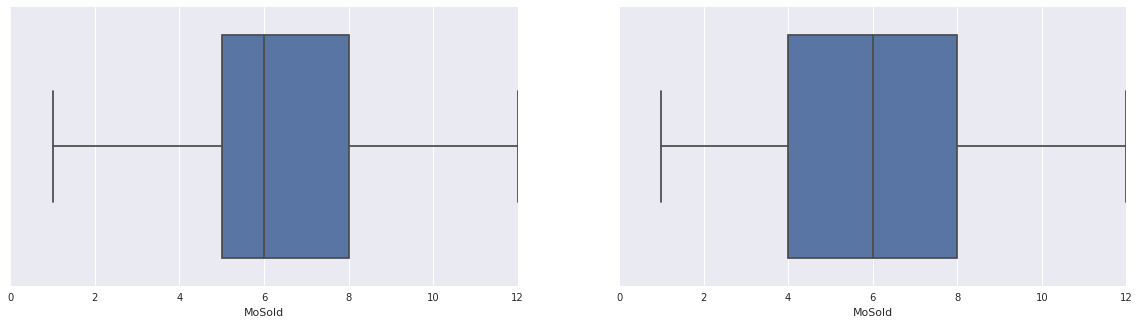

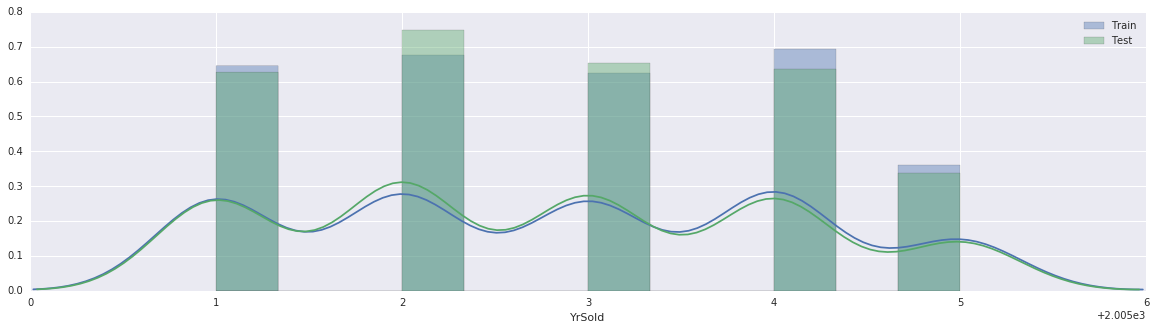

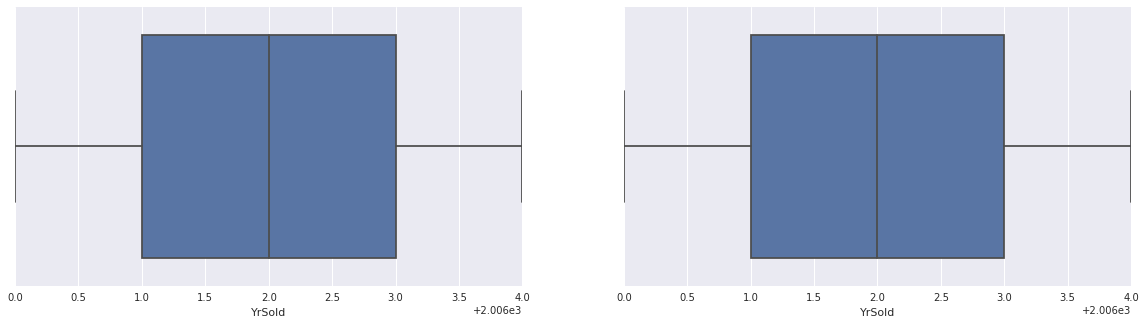

In [209]:
for column_name in continuous_int:
  process_continuous(column_name)

In [210]:
def categorical_histogram(column_name, train, test):
  
  plt.figure(figsize=(20,5))

  order = train[column_name].unique()

  sns.countplot(train[column_name], label='Train', alpha=0.5, order=order)
  sns.countplot(test[column_name], label='Test', alpha=0.5, order=order)

  plt.legend()
  plt.show()

In [211]:
def process_categorical(column_name):
  
  global train, train_trans, test, test_trans
  
  actual_column_name = column_name
  train_df = train
  test_df = test
  
  if (train[column_name].isnull().sum() > 0):
    train_df = train_trans
    train_trans['%s_NaN'%column_name] = (train[column_name].isnull()).astype(np.int)
    train_trans[column_name] = train[column_name].fillna('NA')
  
  if (test[column_name].isnull().sum() > 0):
    test_df = test_trans
    test_trans['%s_NaN'%column_name] = (test[column_name].isnull()).astype(np.int)
    test_trans[column_name] = test[column_name].fillna('NA')
    
  categorical_histogram(column_name, train_df, test_df)
  
  binarizer = preprocessing.LabelBinarizer()
  binarizer.fit(train_df[column_name])
  
  if (len(binarizer.classes_) == 2) :
    columns = [binarizer.classes_[0]]
  else:
    columns = ['%s_%s' % (column_name, s) for s in binarizer.classes_]
  
  train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train_df[column_name]), columns=columns)], axis=1)
  test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test_df[column_name]), columns=columns)], axis=1)

In [ ]:
for column_name in categorical_text:
  process_categorical(column_name)

In [ ]:
for column_name in categorical_int:
  process_categorical(column_name)

In [214]:
train_trans.head()

,LotFrontage_NaN,LotFrontage,MasVnrArea_NaN,MasVnrArea,GarageYrBlt_NaN,GarageYrBlt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Grvl,Alley_NaN,Alley,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_NaN,MasVnrType,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_NaN,BsmtQual,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_NaN,BsmtCond,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_NaN,BsmtExposure,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_NaN,BsmtFinType1,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_NaN,BsmtFinType2,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,N,Electrical_NaN,Electrical,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_NaN,FireplaceQu,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_NaN,GarageType,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NaN,GarageFinish,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Ga

In [215]:
# LotFrontage
print train.LotFrontage.describe()
print
print test.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64


In [216]:
print train_trans.LotFrontage.describe()
print
print test_trans.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1459.000000
mean       68.334476
std        20.569211
min        21.000000
25%        60.000000
50%        67.000000
75%        78.000000
max       200.000000
Name: LotFrontage, dtype: float64


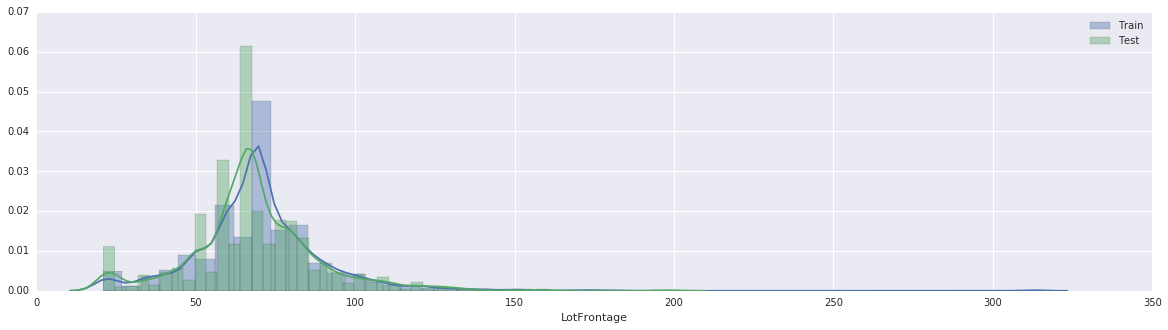

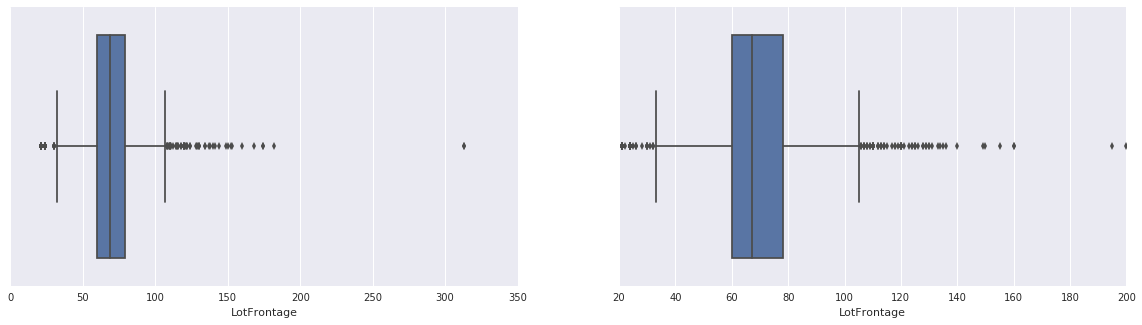

In [217]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['LotFrontage'], label='Train')
sns.distplot(test_trans['LotFrontage'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['LotFrontage'])
plt.subplot(122)
sns.boxplot(test_trans['LotFrontage'])

plt.legend()
plt.show()

In [218]:
train_trans['LotFrontage_gt_125'] = (train.LotFrontage > 125).astype(np.int)
train_trans['LotFrontage_outlier_mask'] = train_trans.LotFrontage
train_trans.loc[train_trans.LotFrontage_outlier_mask > 125, 'LotFrontage_outlier_mask'] = 0

test_trans['LotFrontage_gt_125'] = (test.LotFrontage > 125).astype(np.int)
test_trans['LotFrontage_outlier_mask'] = test_trans.LotFrontage
test_trans.loc[test_trans.LotFrontage_outlier_mask > 125, 'LotFrontage_outlier_mask'] = 0

In [219]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_trans.LotFrontage_outlier_mask.values.reshape(-1,1))

train_trans['LotFrontage_scaled'] = scaler.transform(train_trans.LotFrontage_outlier_mask.values.reshape(-1,1))
test_trans['LotFrontage_scaled'] = scaler.transform(test_trans.LotFrontage_outlier_mask.values.reshape(-1,1))

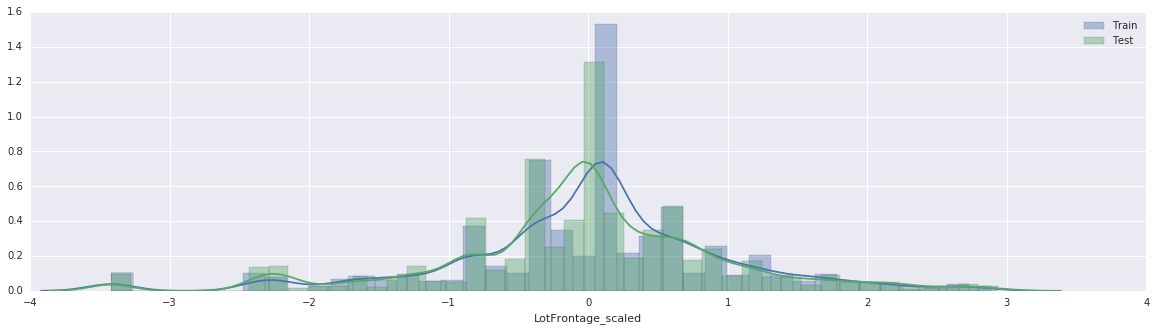

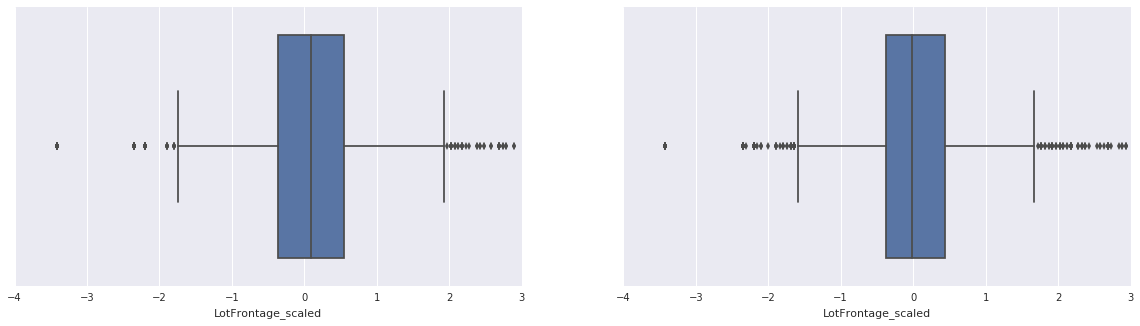

In [221]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['LotFrontage_scaled'], label='Train')
sns.distplot(test_trans['LotFrontage_scaled'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['LotFrontage_scaled'])
plt.subplot(122)
sns.boxplot(test_trans['LotFrontage_scaled'])

plt.legend()
plt.show()

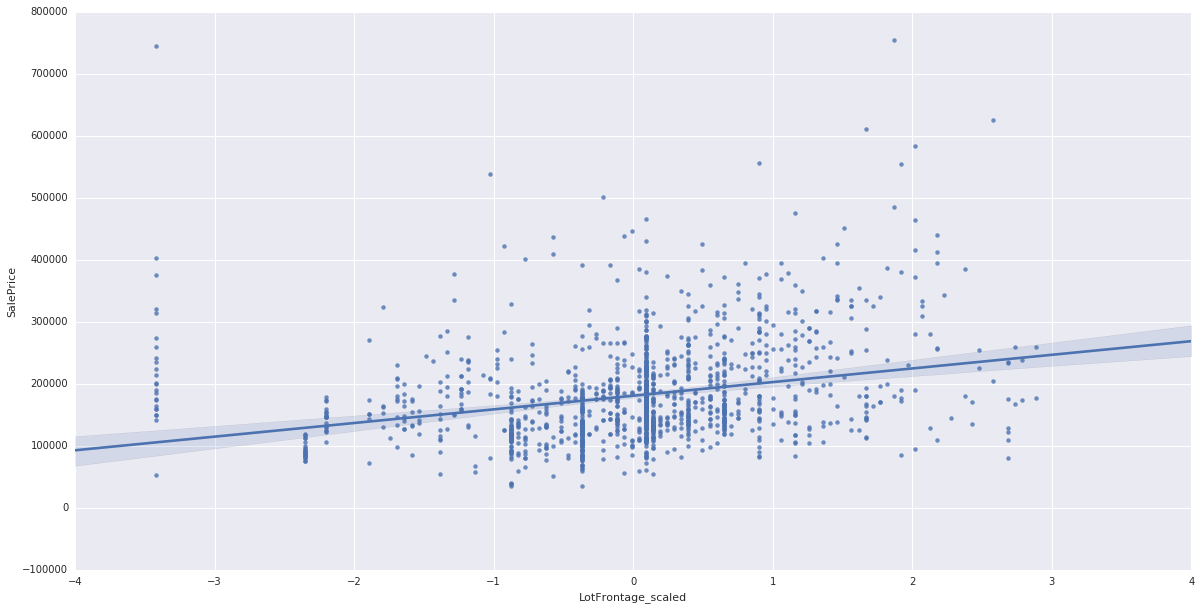

In [222]:
plt.figure(figsize=(20,10))

sns.regplot(x=train_trans.LotFrontage_scaled, y=train.SalePrice)

plt.show()

In [247]:
# MasVnrArea
print train.MasVnrArea.describe()
print
print test.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64


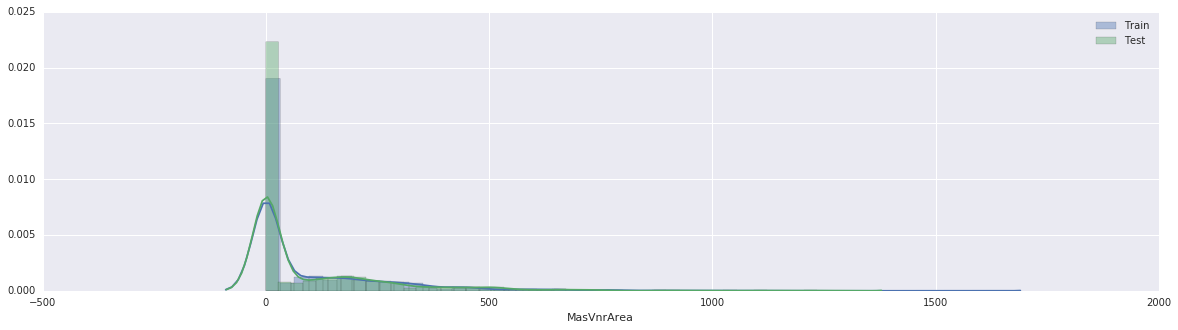

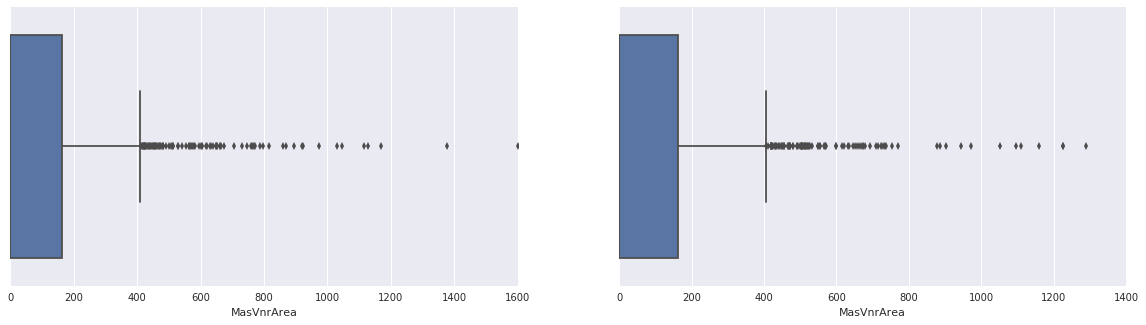

In [248]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['MasVnrArea'], label='Train')
sns.distplot(test_trans['MasVnrArea'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['MasVnrArea'])
plt.subplot(122)
sns.boxplot(test_trans['MasVnrArea'])

plt.legend()
plt.show()

In [249]:
pd.cut(train_trans['MasVnrArea'], bins=[-1, 1, 50, 600, 1000000]).value_counts()

(-1, 1]           871
(50, 600]         510
(1, 50]            40
(600, 1000000]     39
Name: MasVnrArea, dtype: int64

In [270]:
'''train_trans['MasVnrArea_gt_600'] = (train.MasVnrArea > 600).astype(np.int)
train_trans['MasVnrArea_outlier_mask'] = train_trans.MasVnrArea
train_trans.loc[train_trans.MasVnrArea_outlier_mask > 600, 'MasVnrArea_outlier_mask'] = 0

test_trans['MasVnrArea_gt_600'] = (test.MasVnrArea > 600).astype(np.int)
test_trans['MasVnrArea_outlier_mask'] = test_trans.MasVnrArea
test_trans.loc[test_trans.MasVnrArea_outlier_mask > 600, 'MasVnrArea_outlier_mask'] = 0'''

train_trans['MasVnrArea_eq_0'] = (train.MasVnrArea == 0).astype(np.int)
train_trans['MasVnrArea_outlier_mask'] = train_trans.MasVnrArea
tmp = train_trans.MasVnrArea_outlier_mask.mean()
train_trans.loc[train_trans.MasVnrArea_outlier_mask == 0, 'MasVnrArea_outlier_mask'] = tmp
train_trans.loc[train_trans.MasVnrArea_outlier_mask > 600, 'MasVnrArea_outlier_mask'] = tmp

tmp = test_trans.MasVnrArea_outlier_mask.mean()
test_trans['MasVnrArea_eq_0'] = (test.MasVnrArea == 0).astype(np.int)
test_trans['MasVnrArea_outlier_mask'] = test_trans.MasVnrArea
test_trans.loc[test_trans.MasVnrArea_outlier_mask == 0, 'MasVnrArea_outlier_mask'] = tmp
test_trans.loc[test_trans.MasVnrArea_outlier_mask > 600, 'MasVnrArea_outlier_mask'] = tmp

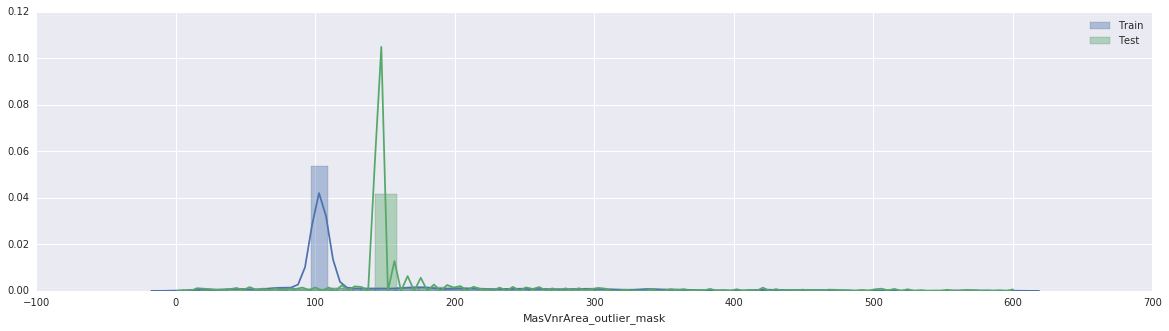

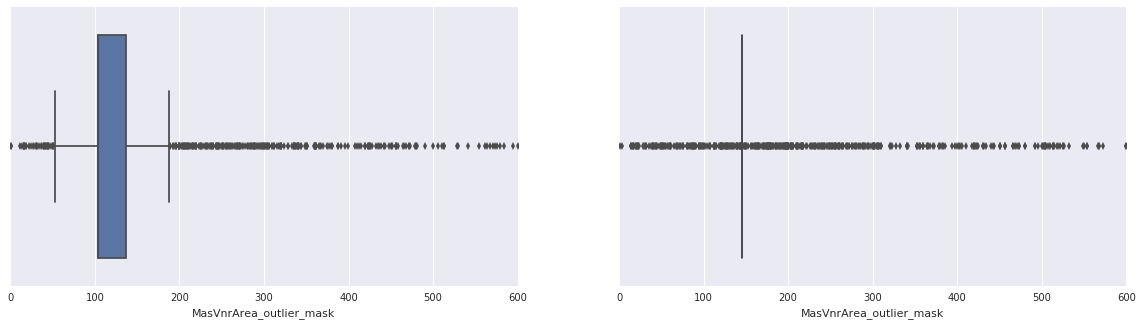

In [271]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['MasVnrArea_outlier_mask'], label='Train')
sns.distplot(test_trans['MasVnrArea_outlier_mask'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['MasVnrArea_outlier_mask'])
plt.subplot(122)
sns.boxplot(test_trans['MasVnrArea_outlier_mask'])

plt.legend()
plt.show()

In [272]:
train_trans['MasVnrArea_boxcox'] = train_trans.MasVnrArea_outlier_mask
train_trans.loc[train_trans.MasVnrArea_boxcox == 0, 'MasVnrArea_boxcox'] = 1e-10
train_trans.MasVnrArea_boxcox = stats.boxcox(train_trans.MasVnrArea_boxcox)[0]

test_trans['MasVnrArea_boxcox'] = test_trans.MasVnrArea_outlier_mask
test_trans.loc[test_trans.MasVnrArea_boxcox == 0, 'MasVnrArea_boxcox'] = 1e-10
test_trans.MasVnrArea_boxcox = stats.boxcox(test_trans.MasVnrArea_boxcox)[0]

In [273]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_trans.MasVnrArea_boxcox.values.reshape(-1,1))

train_trans['MasVnrArea_scaled'] = scaler.transform(train_trans.MasVnrArea_boxcox.values.reshape(-1,1))
test_trans['MasVnrArea_scaled'] = scaler.transform(test_trans.MasVnrArea_boxcox.values.reshape(-1,1))

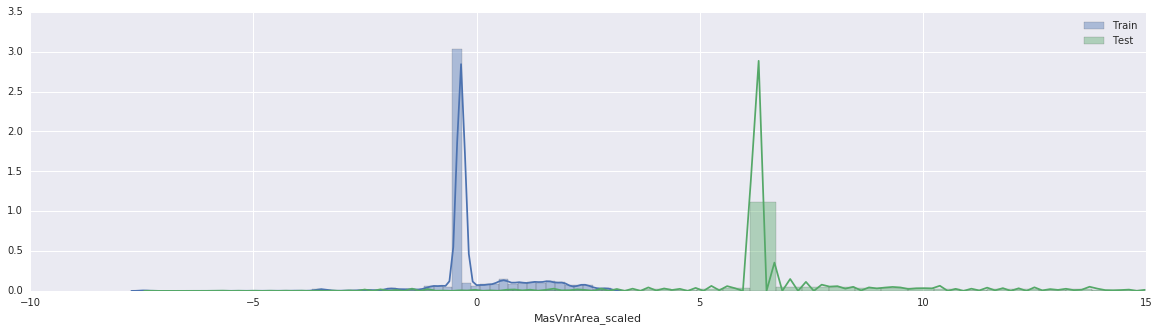

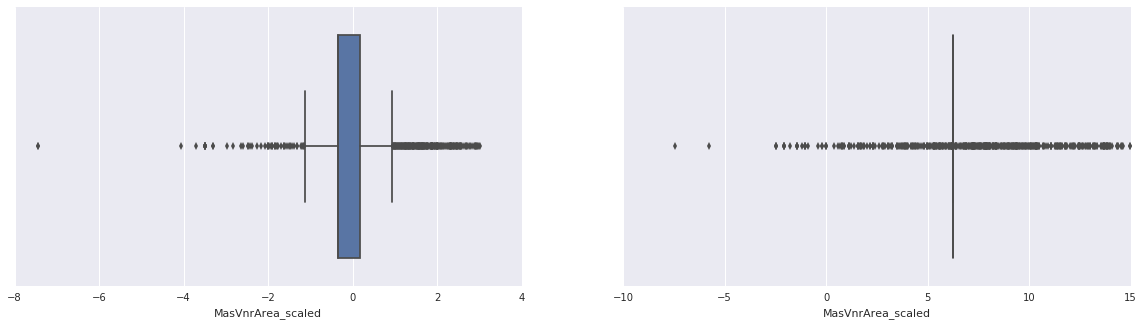

In [274]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['MasVnrArea_scaled'], label='Train')
sns.distplot(test_trans['MasVnrArea_scaled'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['MasVnrArea_scaled'])
plt.subplot(122)
sns.boxplot(test_trans['MasVnrArea_scaled'])

plt.legend()
plt.show()

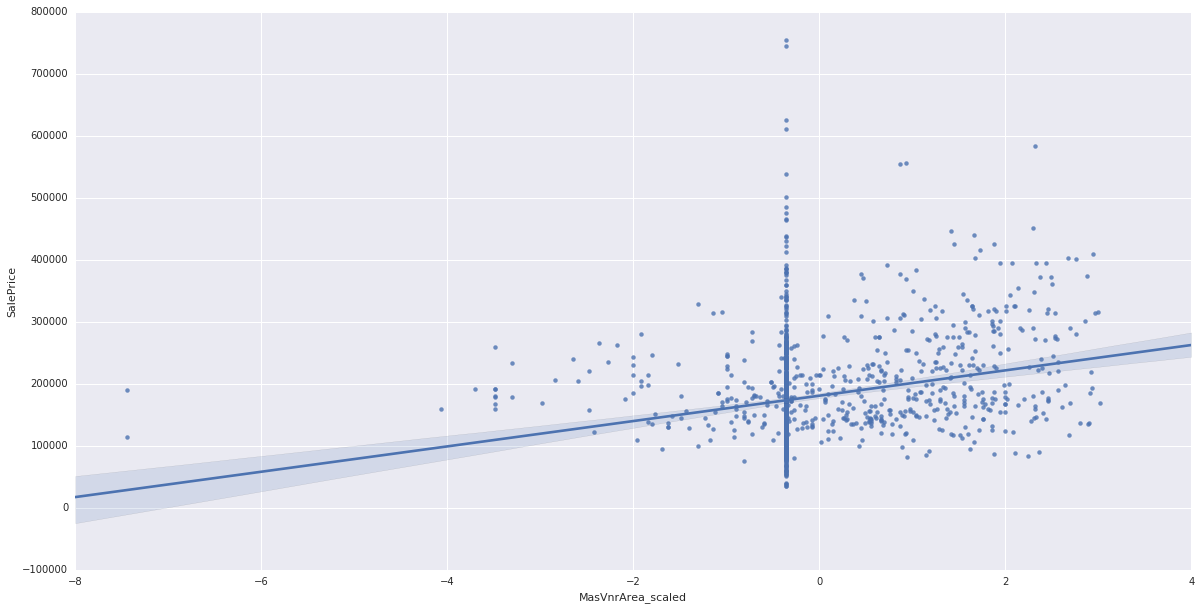

In [275]:
plt.figure(figsize=(20,10))

sns.regplot(x=train_trans.MasVnrArea_scaled, y=train.SalePrice)

plt.show()

In [278]:
# GarageYrBlt
print train.GarageYrBlt.describe()
print
print test.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64


In [282]:
train_trans['GarageYrBlt'] = train.GarageYrBlt
test_trans['GarageYrBlt'] = test.GarageYrBlt

train_trans['GarageYrBlt_Nan'] = (train.GarageYrBlt.isnull()).astype(np.int)
test_trans['GarageYrBlt_Nan'] = (test.GarageYrBlt.isnull()).astype(np.int)

train_trans.GarageYrBlt = train_trans.GarageYrBlt.fillna(0.)
test_trans.GarageYrBlt = test_trans.GarageYrBlt.fillna(0.)

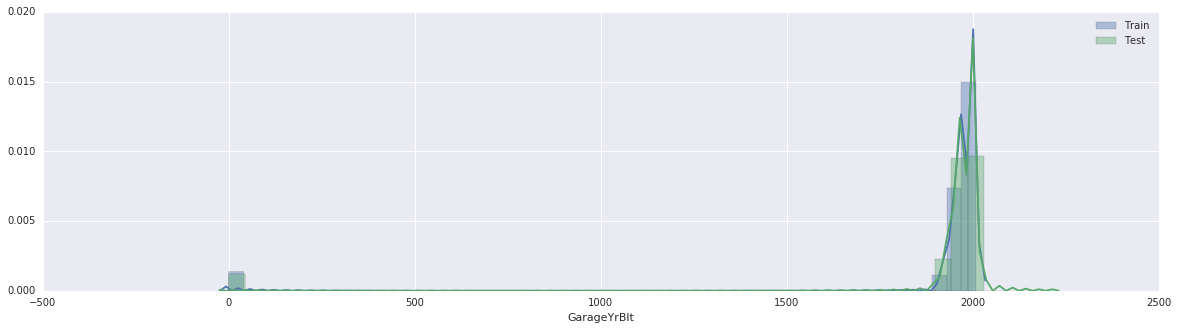

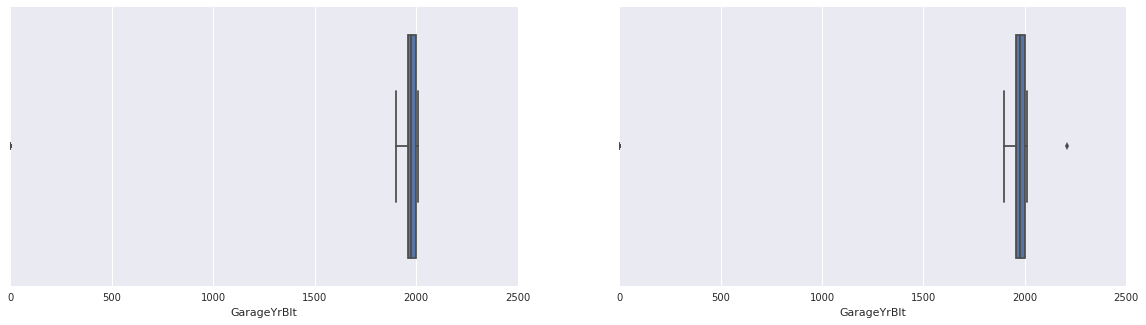

In [284]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['GarageYrBlt'], label='Train')
sns.distplot(test_trans['GarageYrBlt'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['GarageYrBlt'])
plt.subplot(122)
sns.boxplot(test_trans['GarageYrBlt'])

plt.legend()
plt.show()

In [297]:
train_trans['GarageYrBlt_0'] = (train_trans.GarageYrBlt == 0).astype(np.int)
test_trans['GarageYrBlt_0'] = (test_trans.GarageYrBlt == 0).astype(np.int)

train_trans.loc[train_trans.GarageYrBlt == 0, 'GarageYrBlt'] = train_trans.GarageYrBlt.mean()
test_trans.loc[test_trans.GarageYrBlt == 0, 'GarageYrBlt'] = test_trans.GarageYrBlt.mean()

scaler = preprocessing.StandardScaler()
scaler.fit(train_trans.GarageYrBlt.values.reshape(-1,1))

train_trans['GarageYrBlt_scaled'] = scaler.transform(train_trans.GarageYrBlt.values.reshape(-1,1))
test_trans['GarageYrBlt_scaled'] = scaler.transform(test_trans.GarageYrBlt.values.reshape(-1,1))

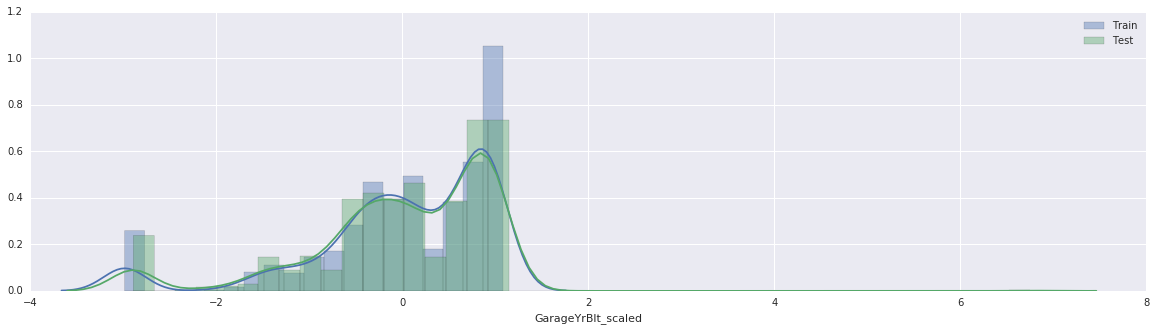

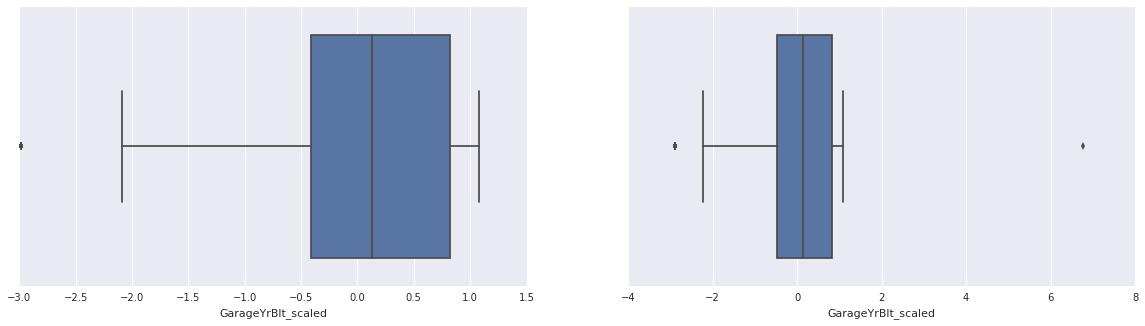

In [298]:
plt.figure(figsize=(20,5))

sns.distplot(train_trans['GarageYrBlt_scaled'], label='Train')
sns.distplot(test_trans['GarageYrBlt_scaled'], label='Test')

plt.legend()
plt.show()

plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(train_trans['GarageYrBlt_scaled'])
plt.subplot(122)
sns.boxplot(test_trans['GarageYrBlt_scaled'])

plt.legend()
plt.show()

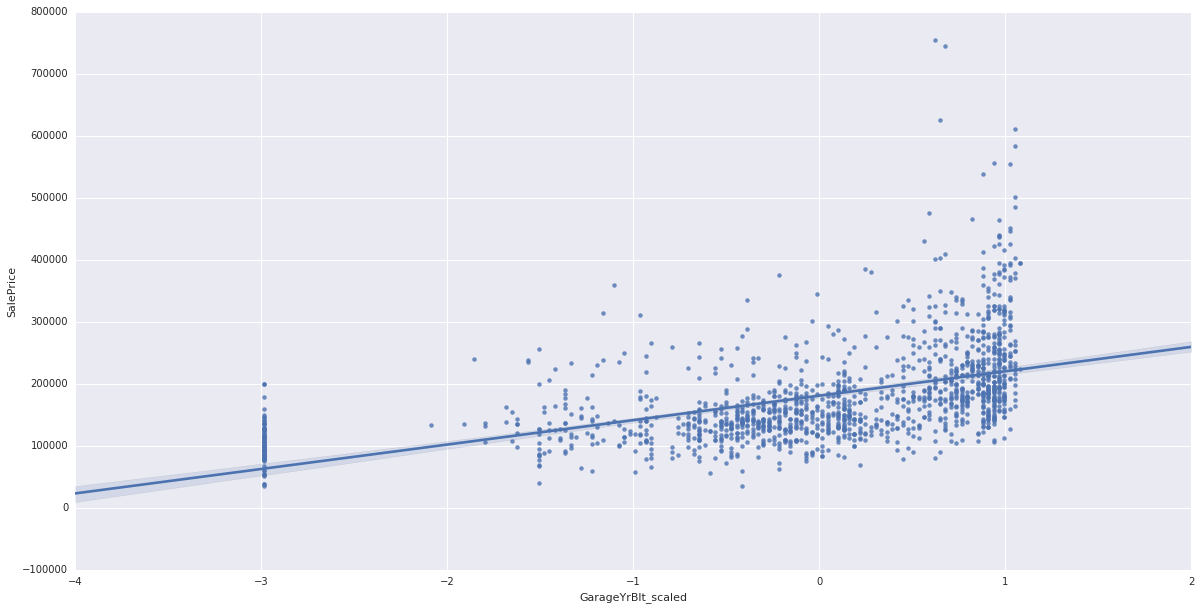

In [299]:
plt.figure(figsize=(20,10))

sns.regplot(x=train_trans.GarageYrBlt_scaled, y=train.SalePrice)

plt.show()

In [300]:
# LotArea
# No NaNs
print train.LotArea.describe()
print
print test.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64


In [301]:
def display_distribution_and_violin(train, train_column, test, test_column):
  
  plt.figure(figsize=(20,5))

  sns.distplot(train[train_column], label='Train')
  sns.distplot(test[test_column], label='Test')

  plt.legend()
  plt.show()

  plt.figure(figsize=(20,5))

  plt.subplot(121)
  sns.boxplot(train[train_column])
  plt.subplot(122)
  sns.boxplot(test[test_column])

  plt.legend()
  plt.show()

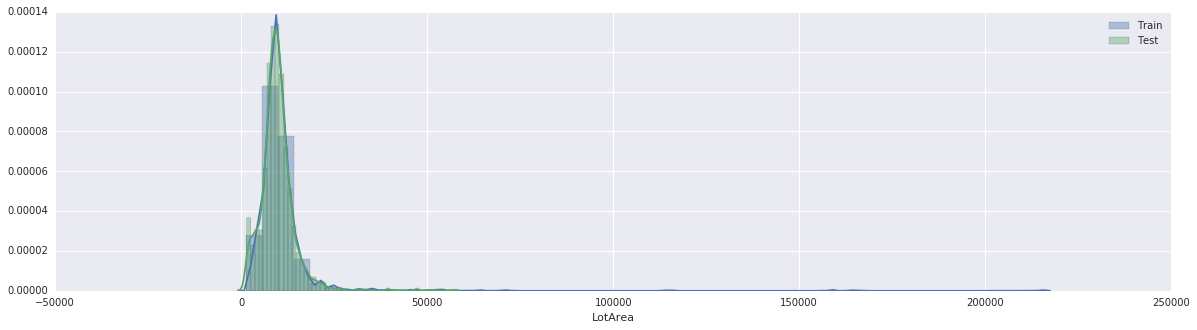

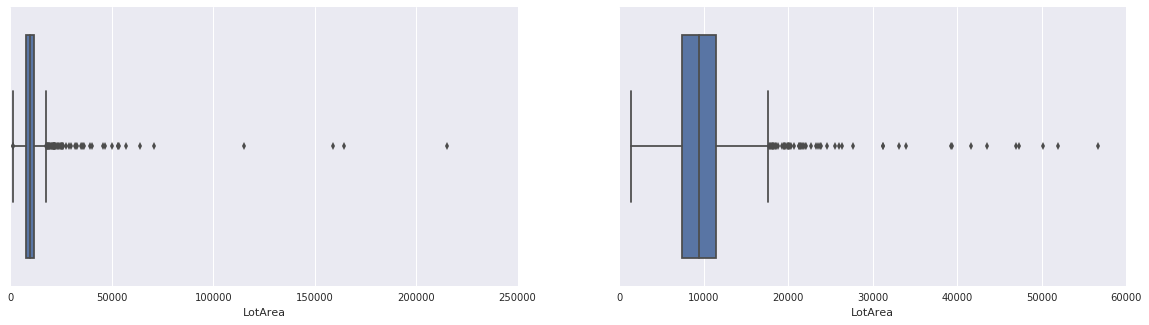

In [302]:
display_distribution_and_violin(train, 'LotArea', test, 'LotArea')

In [311]:
train_trans['LotArea_gt_25k'] = (train.LotArea > 25000).astype(np.int)
test_trans['LotArea_gt_25k'] = (test.LotArea > 25000).astype(np.int)

train_trans['LotArea'] = train.LotArea
train_trans.loc[train_trans.LotArea > 25000, 'LotArea'] = train_trans.LotArea.mean()

test_trans['LotArea'] = test.LotArea
test_trans.loc[test_trans.LotArea > 25000, 'LotArea'] = test_trans.LotArea.mean()

scaler = preprocessing.StandardScaler()
scaler.fit(train_trans.LotArea.values.reshape(-1,1))

train_trans['LotArea_scaled'] = scaler.transform(train_trans.LotArea.values.reshape(-1,1))
test_trans['LotArea_scaled'] = scaler.transform(test_trans.LotArea.values.reshape(-1,1))

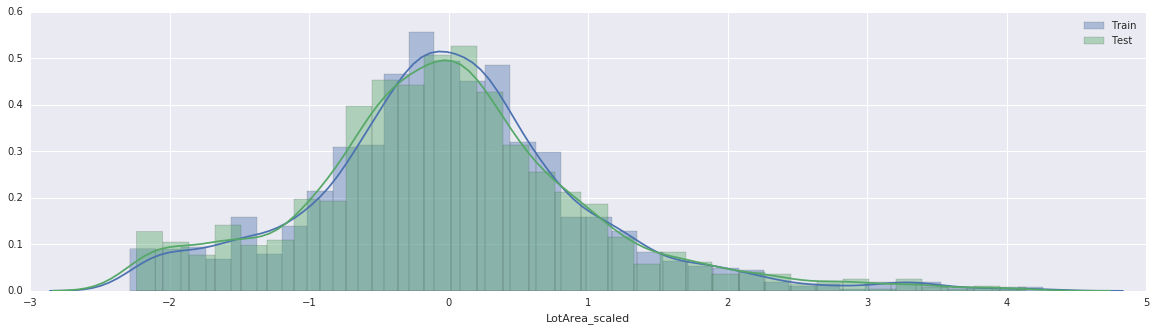

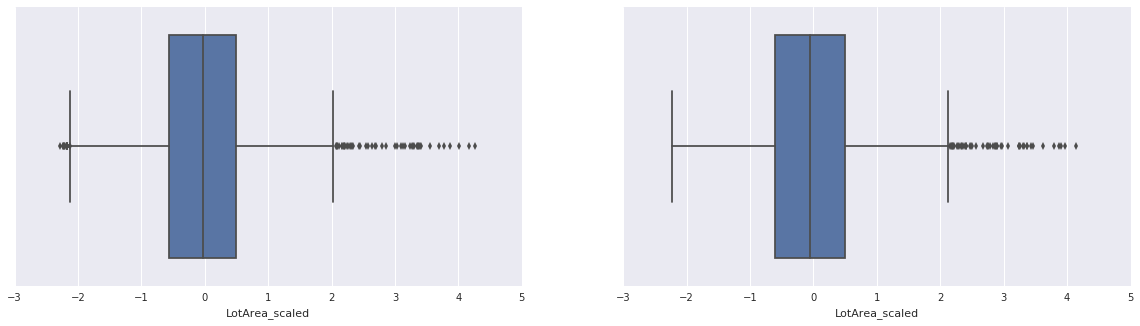

In [313]:
display_distribution_and_violin(train_trans, 'LotArea_scaled', test_trans, 'LotArea_scaled')

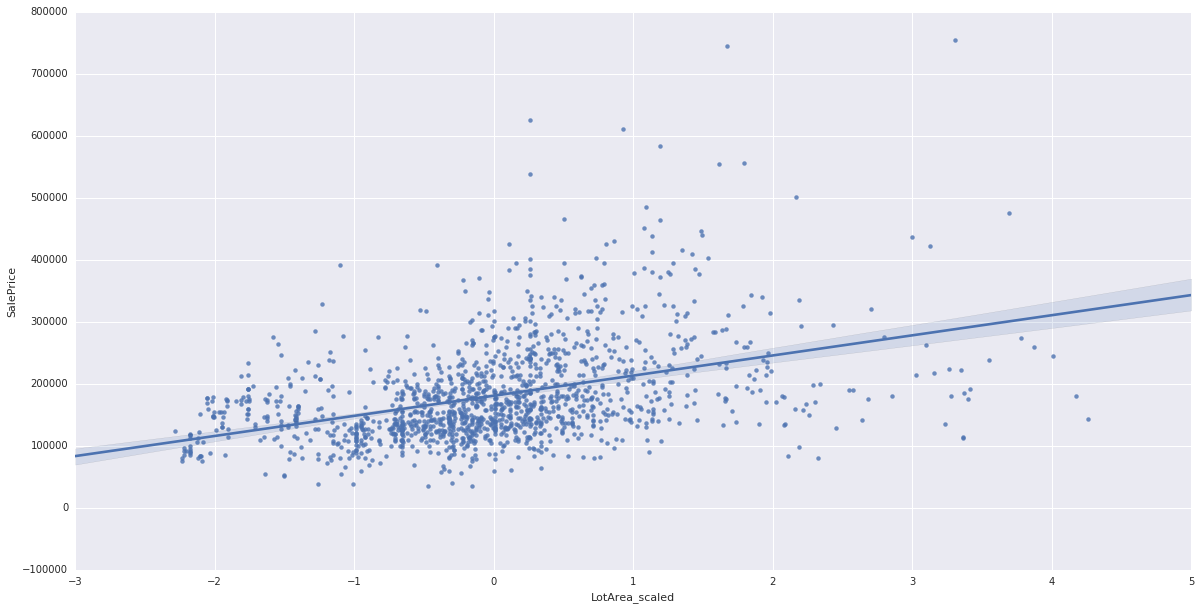

In [314]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_trans.LotArea_scaled, y=train.SalePrice)
plt.show()

In [316]:
# BsmtFinSF1
print train.BsmtFinSF1.describe()
print
# Single missing value
print test.BsmtFinSF1.describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64


In [318]:
test[test.BsmtFinSF1.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [322]:
# Although the single missing value is in the test dataset we'll still fill as usual by introducing a new column to indicate where the NaN was and then filling.
train_trans['BsmtFinSF1_Nan'] = (train.BsmtFinSF1.isnull()).astype(np.int)
test_trans['BsmtFinSF1_Nan'] = (test.BsmtFinSF1.isnull()).astype(np.int)

train_trans['BsmtFinSF1'] = train.BsmtFinSF1.fillna(0)
test_trans['BsmtFinSF1'] = test.BsmtFinSF1.fillna(0)

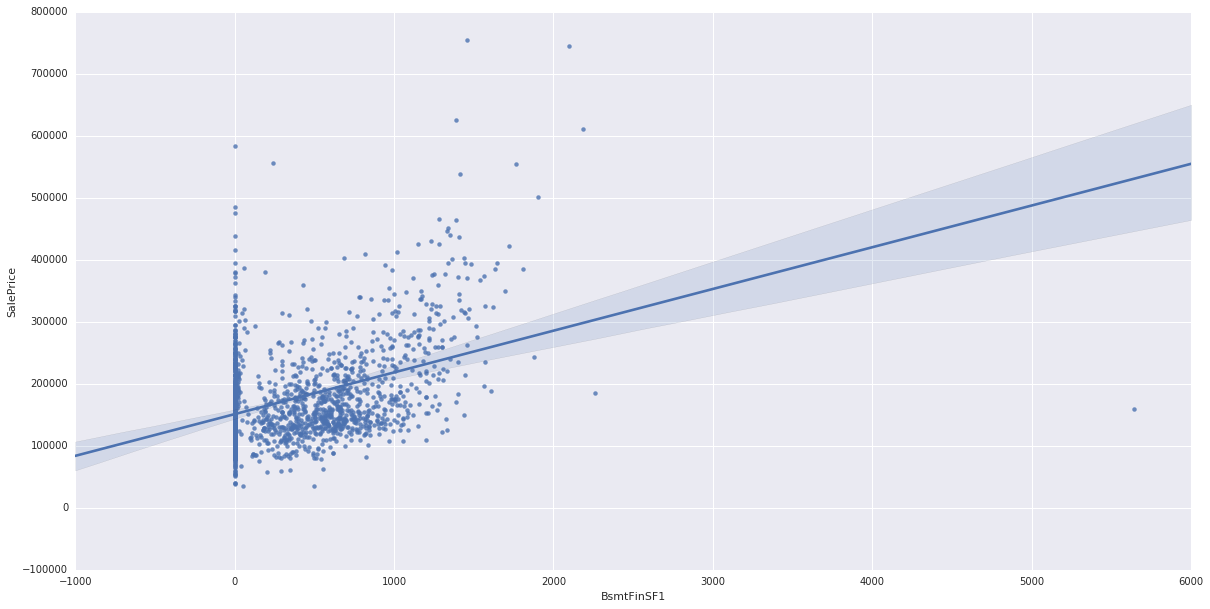

In [324]:
plt.figure(figsize=(20,10))
sns.regplot(x=train.BsmtFinSF1, y=train.SalePrice)
plt.show()

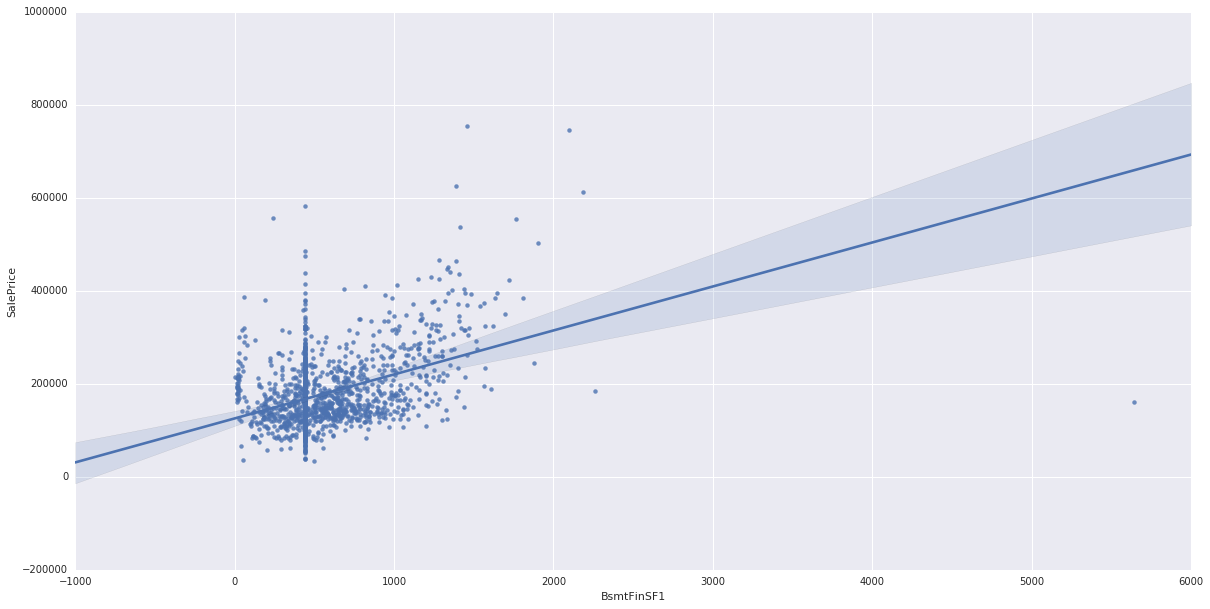

In [329]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_trans.BsmtFinSF1, y=train.SalePrice)
plt.show()

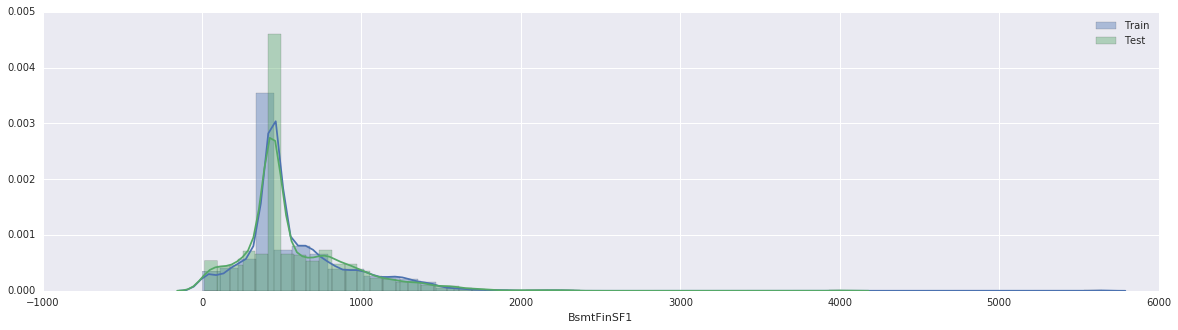

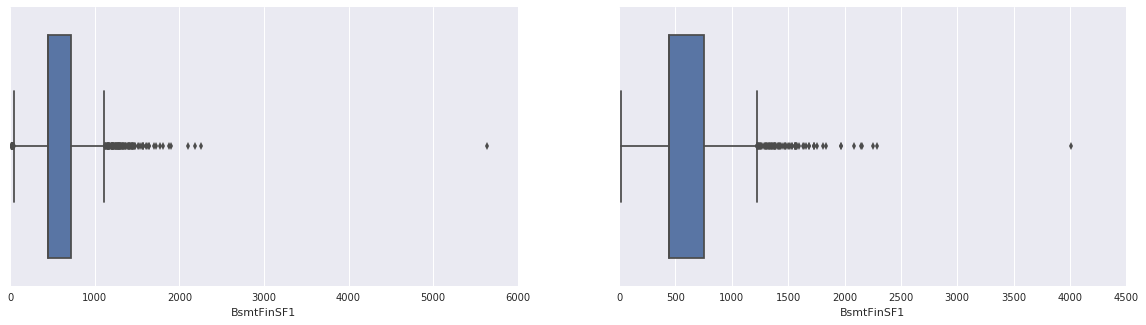

In [328]:
display_distribution_and_violin(train_trans, 'BsmtFinSF1', test_trans, 'BsmtFinSF1')

In [327]:
# Let's experiment with the distribution by removing skew to zero.
train_trans['BsmtFinSF1_zero'] = (train.BsmtFinSF1 == 0).astype(np.int)
test_trans['BsmtFinSF1_zero'] = (test.BsmtFinSF1 == 0).astype(np.int)

train_trans.loc[train_trans.BsmtFinSF1 == 0, 'BsmtFinSF1'] = train_trans.BsmtFinSF1.mean()
test_trans.loc[test_trans.BsmtFinSF1 == 0, 'BsmtFinSF1'] = test_trans.BsmtFinSF1.mean()

# Similarly, let's remove values above 2000

In [323]:
train_trans.head()

,LotFrontage_NaN,LotFrontage,MasVnrArea_NaN,MasVnrArea,GarageYrBlt_NaN,GarageYrBlt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Grvl,Alley_NaN,Alley,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_NaN,MasVnrType,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_NaN,BsmtQual,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_NaN,BsmtCond,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_NaN,BsmtExposure,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_NaN,BsmtFinType1,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_NaN,BsmtFinType2,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,N,Electrical_NaN,Electrical,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_NaN,FireplaceQu,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_NaN,GarageType,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NaN,GarageFinish,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Ga